#Problem Statement:-
##1. You are provided with the weekly sales data for their various outlets. Use statistical analysis, EDA, outlier analysis, and handle the missing values to come up with various insights that can give them a clear perspective on the following:
####a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?
####b. If the weekly sales show a seasonal trend, when and what could be the reason?
####c. Does temperature affect the weekly sales in any manner?
####d. How is the Consumer Price index affecting the weekly sales of various stores?
####e. Top performing stores according to the historical data.
####f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.

##2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

#Solution:-

#Importing Basic Required Libraries:-

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Walmart Weekly Sales Dataset:-

In [31]:
Walmart_dataset = pd.read_csv('/content/Walmart DataSet.zip')
Walmart_dataset

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

#Performing Exploratory Data Analysis(EDA):-

####Renaming The Columns:-

In [32]:
Walmart_dataset.rename(columns = {"Store":"store", "Date":"date", "Weekly_Sales":"sales", "Holiday_Flag":"holiday", "Temperature":"temperature", "Fuel_Price":"fuel_price", "CPI":"cpi", "Unemployment":"unemployement"}, inplace=True)
Walmart_dataset

store        date       sales  holiday  temperature  fuel_price  \
0         1  05-02-2010  1643690.90        0        42.31       2.572   
1         1  12-02-2010  1641957.44        1        38.51       2.548   
2         1  19-02-2010  1611968.17        0        39.93       2.514   
3         1  26-02-2010  1409727.59        0        46.63       2.561   
4         1  05-03-2010  1554806.68        0        46.50       2.625   
...     ...         ...         ...      ...          ...         ...   
6430     45  28-09-2012   713173.95        0        64.88       3.997   
6431     45  05-10-2012   733455.07        0        64.89       3.985   
6432     45  12-10-2012   734464.36        0        54.47       4.000   
6433     45  19-10-2012   718125.53        0        56.47       3.969   
6434     45  26-10-2012   760281.43        0        58.85       3.882   

             cpi  unemployement  
0     211.096358          8.106  
1     211.242170          8.106  
2     211.289143          8.106  
3     211.319643          8.106  
4     211.350143          8.106  
...          ...            ...  
6430  192.013558          8.684  
6431  192.170412          8.667  
6432  192.327265          8.667  
6433  192.330854          8.667  
6434  192.308899          8.667  

[6435 rows x 8 columns]

####Finding Shape of The Dataset:-

In [33]:
Walmart_dataset.shape

(6435, 8)

####Columns In The Dataset:-

In [34]:
Walmart_dataset.columns

Index(['store', 'date', 'sales', 'holiday', 'temperature', 'fuel_price', 'cpi',
       'unemployement'],
      dtype='object')

####Finding Data Types Of Each Columns:-

In [35]:
Walmart_dataset.dtypes

store              int64
date              object
sales            float64
holiday            int64
temperature      float64
fuel_price       float64
cpi              float64
unemployement    float64
dtype: object

####Converting Datatype of "Date" Column from Object to Date-Time Format:-

In [36]:
Walmart_dataset["date"] = pd.to_datetime(Walmart_dataset["date"],  format="%d-%m-%Y")
Walmart_dataset.dtypes

store                     int64
date             datetime64[ns]
sales                   float64
holiday                   int64
temperature             float64
fuel_price              float64
cpi                     float64
unemployement           float64
dtype: object

In [37]:
Walmart_dataset

store       date       sales  holiday  temperature  fuel_price  \
0         1 2010-02-05  1643690.90        0        42.31       2.572   
1         1 2010-02-12  1641957.44        1        38.51       2.548   
2         1 2010-02-19  1611968.17        0        39.93       2.514   
3         1 2010-02-26  1409727.59        0        46.63       2.561   
4         1 2010-03-05  1554806.68        0        46.50       2.625   
...     ...        ...         ...      ...          ...         ...   
6430     45 2012-09-28   713173.95        0        64.88       3.997   
6431     45 2012-10-05   733455.07        0        64.89       3.985   
6432     45 2012-10-12   734464.36        0        54.47       4.000   
6433     45 2012-10-19   718125.53        0        56.47       3.969   
6434     45 2012-10-26   760281.43        0        58.85       3.882   

             cpi  unemployement  
0     211.096358          8.106  
1     211.242170          8.106  
2     211.289143          8.106  
3     211.319643          8.106  
4     211.350143          8.106  
...          ...            ...  
6430  192.013558          8.684  
6431  192.170412          8.667  
6432  192.327265          8.667  
6433  192.330854          8.667  
6434  192.308899          8.667  

[6435 rows x 8 columns]

####Finding All Informations About The Dataset:-

In [38]:
Walmart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   store          6435 non-null   int64         
 1   date           6435 non-null   datetime64[ns]
 2   sales          6435 non-null   float64       
 3   holiday        6435 non-null   int64         
 4   temperature    6435 non-null   float64       
 5   fuel_price     6435 non-null   float64       
 6   cpi            6435 non-null   float64       
 7   unemployement  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


####Computing Basic Statistics For Each Numerical Features:-

In [39]:
Walmart_dataset.describe()

store                 date         sales      holiday  \
count  6435.000000                 6435  6.435000e+03  6435.000000   
mean     23.000000  2011-06-17 00:00:00  1.046965e+06     0.069930   
min       1.000000  2010-02-05 00:00:00  2.099862e+05     0.000000   
25%      12.000000  2010-10-08 00:00:00  5.533501e+05     0.000000   
50%      23.000000  2011-06-17 00:00:00  9.607460e+05     0.000000   
75%      34.000000  2012-02-24 00:00:00  1.420159e+06     0.000000   
max      45.000000  2012-10-26 00:00:00  3.818686e+06     1.000000   
std      12.988182                  NaN  5.643666e+05     0.255049   

       temperature   fuel_price          cpi  unemployement  
count  6435.000000  6435.000000  6435.000000    6435.000000  
mean     60.663782     3.358607   171.578394       7.999151  
min      -2.060000     2.472000   126.064000       3.879000  
25%      47.460000     2.933000   131.735000       6.891000  
50%      62.670000     3.445000   182.616521       7.874000  
75%      74.940000     3.735000   212.743293       8.622000  
max     100.140000     4.468000   227.232807      14.313000  
std      18.444933     0.459020    39.356712       1.875885

####Computing Null Values In The Dataset:-

In [40]:
Walmart_dataset.isnull().sum()

store            0
date             0
sales            0
holiday          0
temperature      0
fuel_price       0
cpi              0
unemployement    0
dtype: int64

####Computing Duplicate Datapoints In The Dataset:-

In [41]:
Walmart_dataset.duplicated().sum()

0

####Computing Correlation Between All Numerical Columns:-

In [42]:
Walmart_dataset.corr(numeric_only=True)

store     sales       holiday  temperature  fuel_price  \
store          1.000000e+00 -0.335332 -4.386841e-16    -0.022659    0.060023   
sales         -3.353320e-01  1.000000  3.689097e-02    -0.063810    0.009464   
holiday       -4.386841e-16  0.036891  1.000000e+00    -0.155091   -0.078347   
temperature   -2.265908e-02 -0.063810 -1.550913e-01     1.000000    0.144982   
fuel_price     6.002295e-02  0.009464 -7.834652e-02     0.144982    1.000000   
cpi           -2.094919e-01 -0.072634 -2.162091e-03     0.176888   -0.170642   
unemployement  2.235313e-01 -0.106176  1.096028e-02     0.101158   -0.034684   

                    cpi  unemployement  
store         -0.209492       0.223531  
sales         -0.072634      -0.106176  
holiday       -0.002162       0.010960  
temperature    0.176888       0.101158  
fuel_price    -0.170642      -0.034684  
cpi            1.000000      -0.302020  
unemployement -0.302020       1.000000

#Creating Custom Dataset On The Basis Of Store:-

In [44]:
store = int(input("Enter The Store Id(1-45):"))
Store_sales = Walmart_dataset[Walmart_dataset["store"]==store]
Store_sales

Enter The Store Id(1-45):25


store       date      sales  holiday  temperature  fuel_price  \
3432     25 2010-02-05  677231.63        0        21.10       2.784   
3433     25 2010-02-12  583364.02        1        19.64       2.773   
3434     25 2010-02-19  676260.67        0        24.16       2.745   
3435     25 2010-02-26  628516.57        0        29.16       2.754   
3436     25 2010-03-05  665750.06        0        29.45       2.777   
...     ...        ...        ...      ...          ...         ...   
3570     25 2012-09-28  683300.84        0        54.52       3.997   
3571     25 2012-10-05  699536.73        0        57.58       3.985   
3572     25 2012-10-12  697317.41        0        43.74       4.000   
3573     25 2012-10-19  685531.85        0        51.93       3.969   
3574     25 2012-10-26  688940.94        0        56.69       3.882   

             cpi  unemployement  
3432  204.247194          8.187  
3433  204.385747          8.187  
3434  204.432100          8.187  
3435  204.463087          8.187  
3436  204.494073          8.187  
...          ...            ...  
3570  215.736716          7.280  
3571  215.925886          7.293  
3572  216.115057          7.293  
3573  216.146470          7.293  
3574  216.151590          7.293  

[143 rows x 8 columns]

#Computing Store-Wise Total Sales:-

In [45]:
Total_storewise_sales = pd.DataFrame(Walmart_dataset.groupby(Walmart_dataset.store)["sales"].sum())
Total_storewise_sales['sales'] = Total_storewise_sales['sales'].astype(int)
Total_storewise_sales = Total_storewise_sales.reset_index()
Total_storewise_sales

store      sales
0       1  222402808
1       2  275382440
2       3   57586735
3       4  299543953
4       5   45475688
5       6  223756130
6       7   81598275
7       8  129951181
8       9   77789218
9      10  271617713
10     11  193962786
11     12  144287230
12     13  286517703
13     14  288999911
14     15   89133683
15     16   74252425
16     17  127782138
17     18  155114734
18     19  206634862
19     20  301397792
20     21  108117878
21     22  147075648
22     23  198750617
23     24  194016021
24     25  101061179
25     26  143416393
26     27  253855916
27     28  189263680
28     29   77141554
29     30   62716885
30     31  199613905
31     32  166819246
32     33   37160221
33     34  138249763
34     35  131520672
35     36   53412214
36     37   74202740
37     38   55159626
38     39  207445542
39     40  137870309
40     41  181341934
41     42   79565752
42     43   90565435
43     44   43293087
44     45  112395341

#Visualizing Store-Wise Total Sales:-

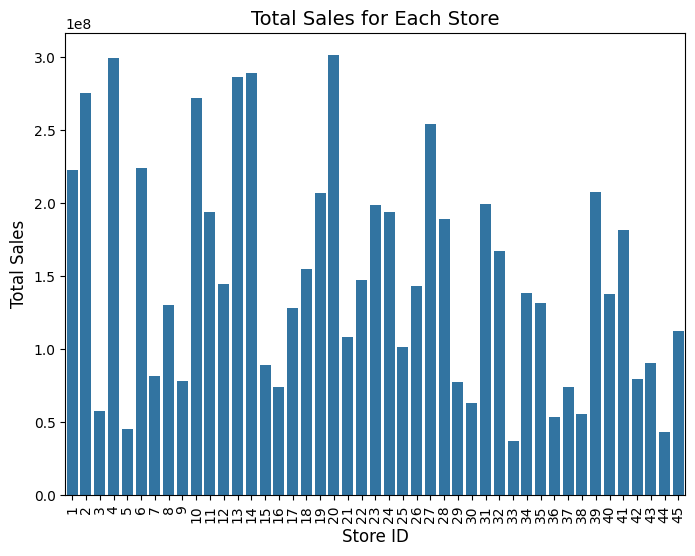

In [46]:
plt.figure(figsize=(8, 6))
sns.barplot(x=Total_storewise_sales["store"], y=Total_storewise_sales["sales"], color=sns.color_palette()[0])
plt.xlabel("Store ID", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=90)
plt.title("Total Sales for Each Store", fontsize=14)
plt.show()

#Task:If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

In [47]:
import scipy.stats as stats

In [48]:
Walmart_dataset.corr()

store          date     sales       holiday  \
store          1.000000e+00  1.577299e-13 -0.335332 -4.386841e-16   
date           1.577299e-13  1.000000e+00  0.006949 -1.328524e-02   
sales         -3.353320e-01  6.949360e-03  1.000000  3.689097e-02   
holiday       -4.386841e-16 -1.328524e-02  0.036891  1.000000e+00   
temperature   -2.265908e-02  1.453566e-01 -0.063810 -1.550913e-01   
fuel_price     6.002295e-02  7.714439e-01  0.009464 -7.834652e-02   
cpi           -2.094919e-01  7.715746e-02 -0.072634 -2.162091e-03   
unemployement  2.235313e-01 -2.482029e-01 -0.106176  1.096028e-02   

               temperature  fuel_price       cpi  unemployement  
store            -0.022659    0.060023 -0.209492       0.223531  
date              0.145357    0.771444  0.077157      -0.248203  
sales            -0.063810    0.009464 -0.072634      -0.106176  
holiday          -0.155091   -0.078347 -0.002162       0.010960  
temperature       1.000000    0.144982  0.176888       0.101158  
fuel_price        0.144982    1.000000 -0.170642      -0.034684  
cpi               0.176888   -0.170642  1.000000      -0.302020  
unemployement     0.101158   -0.034684 -0.302020       1.000000

##Inference:- From above we can clearly say that Unemployment has correlation with Weekly sales.

In [49]:
correlation = stats.pearsonr(Walmart_dataset['sales'], Walmart_dataset['unemployement'])[0]

if correlation < 0:
  print("\nThere is a negative correlation between sales and unemployment rate, meaning that as unemployment rate increases, sales decrease.")
else:
  print("\nThere is a positive correlation between sales and unemployment rate, meaning that as unemployment rate increases, sales increase.")


There is a negative correlation between sales and unemployment rate, meaning that as unemployment rate increases, sales decrease.


In [50]:
unemployement_rate = Walmart_dataset['unemployement'].mean()

high_unemployement_stores = Walmart_dataset[Walmart_dataset['unemployement'] > unemployement_rate]

suffering_stores = high_unemployement_stores.groupby('store')['sales'].sum().sort_values(ascending=True).astype(int)

print("Stores suffering the most from high unemployment:")
print(suffering_stores.head())

Stores suffering the most from high unemployment:
store
44     2211695
25     5248226
1     12178638
4     15824390
20    16547027
Name: sales, dtype: int64


##Inference:- Store:{1,4,20,25,44} is suffering the most due high unemployment with store {44} leading the row having the lowest sales of 2211695.

#Task: Does temperature affect the weekly sales in any manner?

In [51]:
correlation = stats.pearsonr(Walmart_dataset['sales'], Walmart_dataset['temperature'])[0]

if correlation < 0:
  print("\nThere is a negative correlation between sales and temperature, meaning that as temperature increases, sales decrease.")
else:
  print("\nThere is a positive correlation between sales and temperature, meaning that as temperature increases, sales increase.")



There is a negative correlation between sales and temperature, meaning that as temperature increases, sales decrease.


##Inference:- Yes, Temperature affects the weekly sales in negative manner.

#Task: How is the Consumer Price index affecting the weekly sales of various stores?

In [52]:
correlation = stats.pearsonr(Walmart_dataset['sales'], Walmart_dataset['cpi'])[0]
if correlation < 0:
  print("\nThere is a negative correlation between sales and CPI, meaning that as CPI increases, sales decrease.")
else:
  print("\nThere is a positive correlation between sales and CPI, meaning that as CPI increases, sales increase.")


There is a negative correlation between sales and CPI, meaning that as CPI increases, sales decrease.


##Inference:- Consumer Price Index Is Having Negative Correlation with The Weekly Sales.

In [53]:
cpi_mean = Walmart_dataset['cpi'].mean()
High_cpi_stores = Walmart_dataset[Walmart_dataset['cpi'] > cpi_mean]
Suffering_stores = High_cpi_stores.groupby('store')['sales'].sum().sort_values(ascending=True).astype(int)
print("Stores suffering the most from high CPI:")
print(Suffering_stores.head())

Stores suffering the most from high CPI:
store
5     45475688
36    53412214
3     57586735
30    62716885
37    74202740
Name: sales, dtype: int64


##Inference:- Stores:{3,5,30,36,37} are suffering the most due to high Comsumer Price Index(CPI) with store{5} leading the row having lowest sales of 45475688.

#Task: Top performing stores according to the historical data.

In [54]:
Top_performing_stores = Walmart_dataset.groupby('store')['sales'].sum().sort_values(ascending=False).astype(int)
print("Top Performing Stores:")
print(Top_performing_stores.head())


Top Performing Stores:
store
20    301397792
4     299543953
14    288999911
13    286517703
2     275382440
Name: sales, dtype: int64


##Inference:- According to the Historical data, Stores{2,4,13,14,20} are the most performing stores with store{20} leading the row having highest sales of 301397792.

#Task: The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [55]:
Worst_performing_stores = Walmart_dataset.groupby('store')['sales'].sum().sort_values(ascending=True).astype(int)
print("Worst Performing Stores:")
print(Worst_performing_stores.head())

Worst Performing Stores:
store
33    37160221
44    43293087
5     45475688
36    53412214
38    55159626
Name: sales, dtype: int64


##Inference:- Store{5,33,36,38,44} are the worst performing stores with store{33} leading the row having lowest sales of 37160221.

####Difference of Sales Between Highest Performing Store And Lowest Performing Store:-

In [56]:
Difference = Top_performing_stores.values[0] - Worst_performing_stores.values[0]
print(f'The difference of sales between the Most Performing and Worst Performing store is :', Difference)

The difference of sales between the Most Performing and Worst Performing store is : 264237571


##Inference:- Difference in Sales = 264237571.

#Task: Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

#Building Predictive Model to Forecast Total Sales at Walmart:-

##Creating Time-Series DataFrame:-

In [57]:
Walmart_sales = Walmart_dataset.groupby('date')['sales'].sum().reset_index()
Walmart_sales

date        sales
0   2010-02-05  49750740.50
1   2010-02-12  48336677.63
2   2010-02-19  48276993.78
3   2010-02-26  43968571.13
4   2010-03-05  46871470.30
..         ...          ...
138 2012-09-28  43734899.40
139 2012-10-05  47566639.31
140 2012-10-12  46128514.25
141 2012-10-19  45122410.57
142 2012-10-26  45544116.29

[143 rows x 2 columns]

##Setting "Date" Column As Index:-

In [58]:
Walmart_sales.set_index('date', inplace=True)
Walmart_sales

sales
date                   
2010-02-05  49750740.50
2010-02-12  48336677.63
2010-02-19  48276993.78
2010-02-26  43968571.13
2010-03-05  46871470.30
...                 ...
2012-09-28  43734899.40
2012-10-05  47566639.31
2012-10-12  46128514.25
2012-10-19  45122410.57
2012-10-26  45544116.29

[143 rows x 1 columns]

##Visualizing the Weekly Sales at Walmart:-

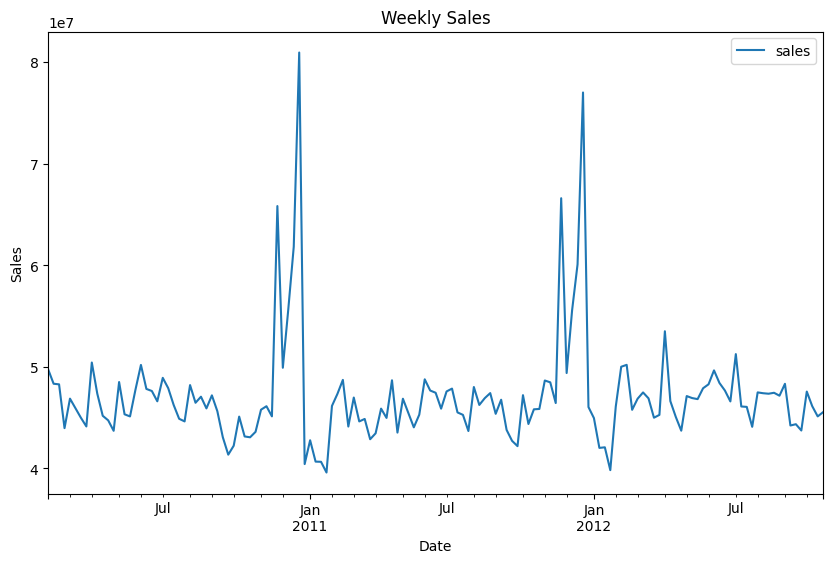

In [59]:
Walmart_sales.plot(figsize=(10, 6))
plt.title('Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

##Checking The Stationarity In The Data:-

In [60]:
from statsmodels.tsa.stattools import adfuller

In [61]:
Walmart_result = adfuller(Walmart_sales['sales'])
print(Walmart_result)

(-5.908297957186335, 2.675979158986003e-07, 4, 138, {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}, 4314.46014989216)


In [62]:
if Walmart_result[1]>0.05:
  print("The data is not stationary")
else:
  print("The data is stationary")

The data is stationary


##Decomposing The Time-Series Into Several Components: Trends, Seasonality And residual:-

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose

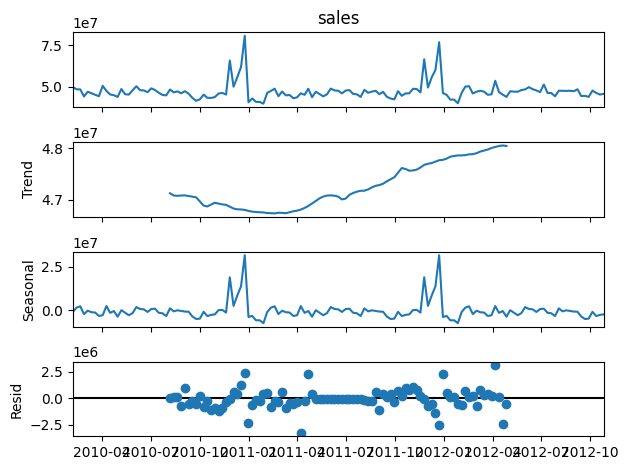

In [64]:
Decomposition = seasonal_decompose(Walmart_sales['sales'])
Decomposition.plot()
plt.show()

##Splitting The Data For Training and Testing:-

In [65]:
train = Walmart_sales.iloc[:120]
test = Walmart_sales.iloc[121:]

##Finding The best Order of p,q,d Using Itertools:-

In [66]:
from statsmodels.tsa.arima.model import ARIMA

In [67]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination


print(len(pdq_combination))

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

results

128


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  

RMSE
(0, 0, 0)  1.858052e+06
(0, 0, 1)  1.859686e+06
(0, 0, 2)  1.867598e+06
(0, 0, 3)  1.858109e+06
(0, 0, 4)  1.849258e+06
...                 ...
(7, 1, 3)  1.886458e+06
(7, 1, 4)  1.901945e+06
(7, 1, 5)  1.535307e+06
(7, 1, 6)  1.564625e+06
(7, 1, 7)  1.890516e+06

[128 rows x 1 columns]

In [68]:
results.sort_values("RMSE")

RMSE
(2, 1, 7)  1.510696e+06
(3, 1, 7)  1.524383e+06
(6, 1, 5)  1.525759e+06
(6, 1, 7)  1.532602e+06
(7, 1, 5)  1.535307e+06
...                 ...
(5, 0, 3)  2.189729e+06
(6, 0, 7)  2.190008e+06
(6, 0, 3)  2.305027e+06
(7, 0, 3)  2.317504e+06
(7, 0, 4)  2.318867e+06

[128 rows x 1 columns]

##Inference:- Best Order Of P,q,d = (2,1,7)

##Training The SARIMA Model:-

In [69]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train,order=(2,1,7),seasonal_order=(2,1,7,52))
model = model.fit()
Walmart_sales['predict'] = model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


##Forecasting Weekly Sales For Walmart:-

<Axes: xlabel='date'>

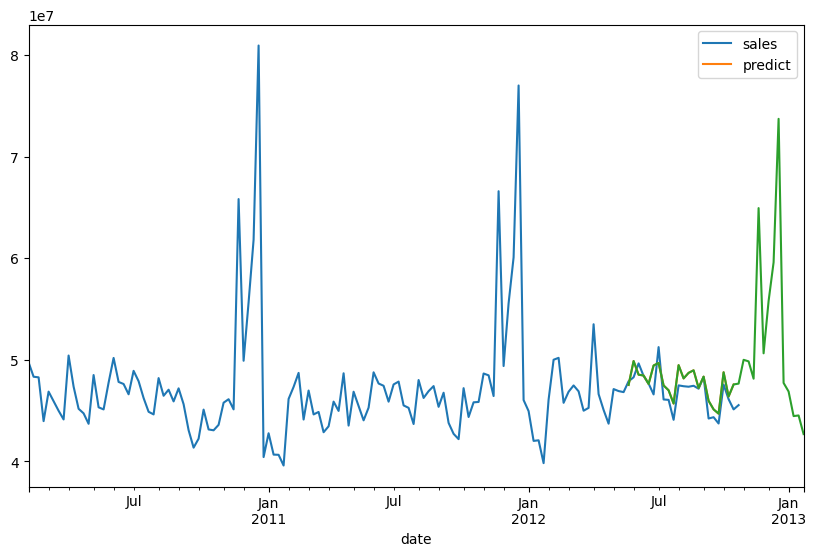

In [70]:
forecast = model.forecast(steps = 36)
Walmart_sales.plot(figsize=(10,6))
forecast.plot(figsize=(10,6))

#Building Predictive Model to Forecast Total Sales At Store{1}:-

##Filtering Data For Store{1}:-

In [71]:
Store1 = Walmart_dataset[Walmart_dataset['store'] == 1]
Store1

store       date       sales  holiday  temperature  fuel_price  \
0        1 2010-02-05  1643690.90        0        42.31       2.572   
1        1 2010-02-12  1641957.44        1        38.51       2.548   
2        1 2010-02-19  1611968.17        0        39.93       2.514   
3        1 2010-02-26  1409727.59        0        46.63       2.561   
4        1 2010-03-05  1554806.68        0        46.50       2.625   
..     ...        ...         ...      ...          ...         ...   
138      1 2012-09-28  1437059.26        0        76.08       3.666   
139      1 2012-10-05  1670785.97        0        68.55       3.617   
140      1 2012-10-12  1573072.81        0        62.99       3.601   
141      1 2012-10-19  1508068.77        0        67.97       3.594   
142      1 2012-10-26  1493659.74        0        69.16       3.506   

            cpi  unemployement  
0    211.096358          8.106  
1    211.242170          8.106  
2    211.289143          8.106  
3    211.319643          8.106  
4    211.350143          8.106  
..          ...            ...  
138  222.981658          6.908  
139  223.181477          6.573  
140  223.381296          6.573  
141  223.425723          6.573  
142  223.444251          6.573  

[143 rows x 8 columns]

##Creating Time-Series DataFrame and Setting "Date" Column As Index:-



In [72]:
Store1 = Store1[['date', 'sales']]
Store1.set_index('date', inplace=True)
Store1

sales
date                  
2010-02-05  1643690.90
2010-02-12  1641957.44
2010-02-19  1611968.17
2010-02-26  1409727.59
2010-03-05  1554806.68
...                ...
2012-09-28  1437059.26
2012-10-05  1670785.97
2012-10-12  1573072.81
2012-10-19  1508068.77
2012-10-26  1493659.74

[143 rows x 1 columns]

##Visualizing the Weekly Sales at Walmart:-


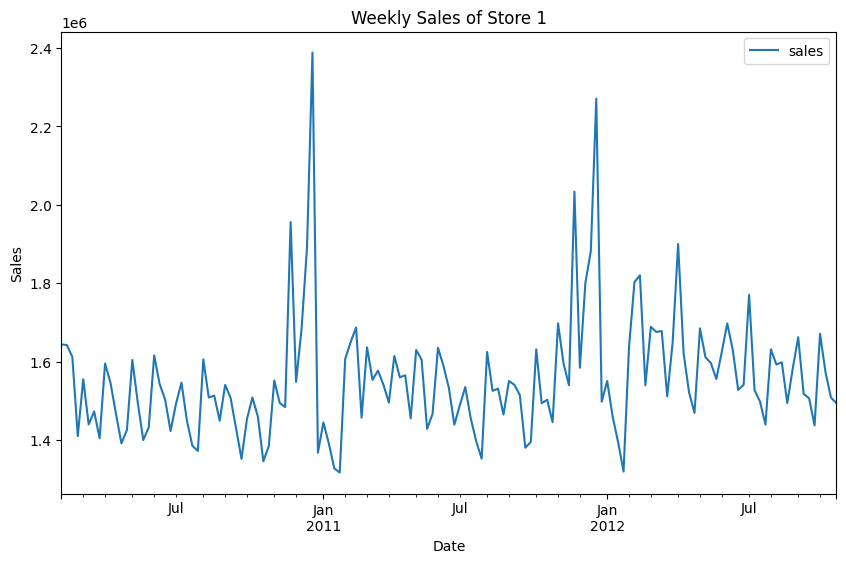

In [73]:
Store1.plot(figsize=(10, 6))
plt.title('Weekly Sales of Store 1')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

##Checking The Stationarity In The Data:-


In [74]:
result1 = adfuller(Store1['sales'])
print(result1)

(-5.102186145192288, 1.3877788330759434e-05, 4, 138, {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}, 3412.7325502876756)


In [75]:
if(result1[1]>0.05):
  print("The data is not stationary")
else:
  print("The data is stationary")

The data is stationary


##Decomposing The Time-Series Into Several Components: Trends, Seasonality And residual:-


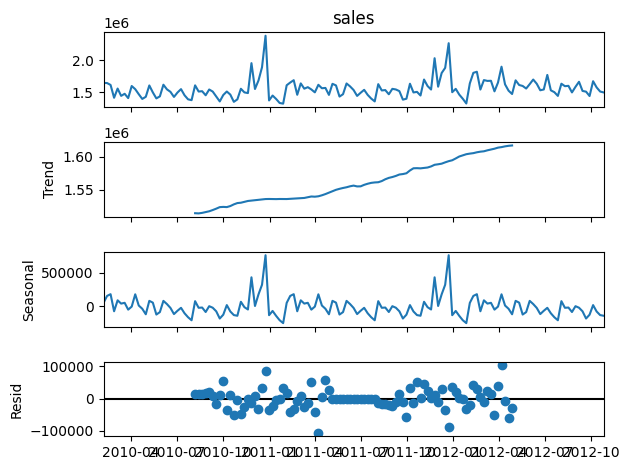

In [76]:
Decomposition = seasonal_decompose(Store1['sales'])
Decomposition.plot()
plt.show()

##Splitting The Data For Training and Testing:-


In [77]:
train = Store1.iloc[:120]
test = Store1.iloc[121:]

##Finding The best Order of p,q,d Using Itertools:-


In [78]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination


print(len(pdq_combination))

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

results

128


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  

RMSE
(0, 0, 0)   85054.701117
(0, 0, 1)   84705.033674
(0, 0, 2)   84581.599622
(0, 0, 3)   86284.235165
(0, 0, 4)   82150.656016
...                  ...
(7, 1, 3)  100433.390602
(7, 1, 4)   99187.117584
(7, 1, 5)   85186.485559
(7, 1, 6)   89020.171012
(7, 1, 7)   94553.838476

[128 rows x 1 columns]

In [79]:
results.sort_values("RMSE")

RMSE
(7, 0, 6)   74584.823591
(6, 1, 6)   74622.862541
(6, 0, 6)   75666.864143
(6, 0, 5)   75829.710745
(7, 0, 5)   75997.280248
...                  ...
(5, 1, 1)  100099.425873
(6, 1, 4)  100238.908963
(7, 1, 3)  100433.390602
(6, 1, 2)  100448.219858
(5, 1, 4)  101216.707490

[128 rows x 1 columns]

##Inference:- Best Order of P,d,q = {7,0,6}

##Training The SARIMA Model:-


In [81]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model1=SARIMAX(train,order=(7,0,6),seasonal_order=(7,0,6,52))
model1=model1.fit()
Store1['predict']=model1.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-81-9f1e89b85dc4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Store1['predict']=model1.predict(start=le

<Axes: xlabel='date'>

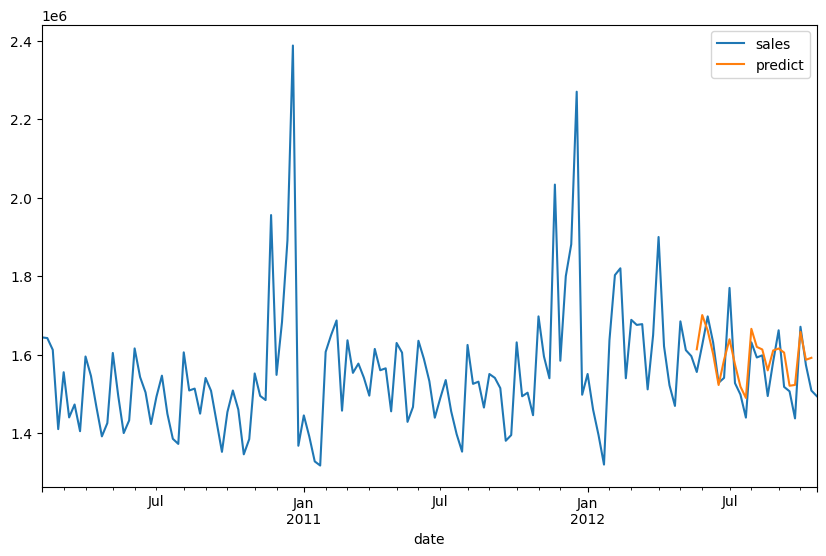

In [82]:
Store1[['sales','predict']].plot(figsize=(10,6))

##Forecasting Weekly Sales For Store{1}:-

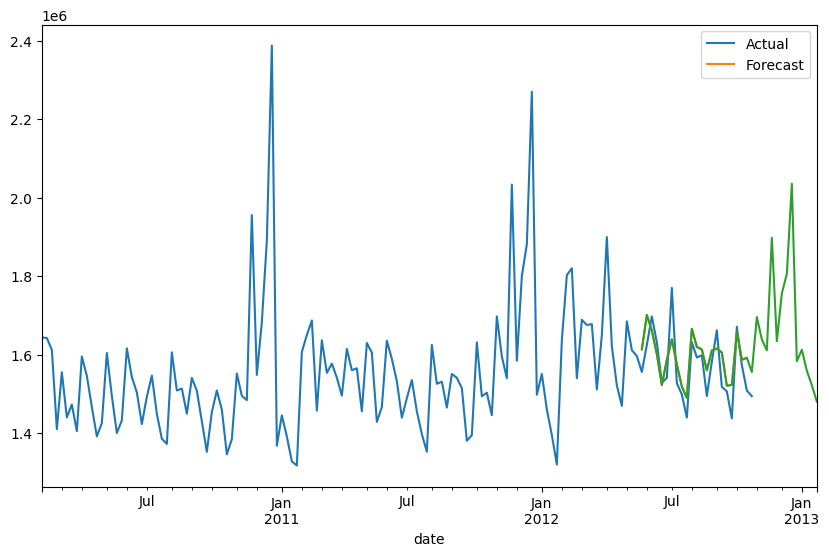

In [83]:
forecast1 = model1.forecast(steps = 36)
Store1.plot(figsize=(10,6))
forecast1.plot(figsize=(10,6))
plt.legend(['Actual','Forecast'])
plt.show()

#Building Predictive Model to Forecast Total Sales at Store{2}:-




##Filtering Data For Store{2}:-

In [84]:
Store2 = Walmart_dataset[Walmart_dataset['store'] == 2]
Store2

store       date       sales  holiday  temperature  fuel_price  \
143      2 2010-02-05  2136989.46        0        40.19       2.572   
144      2 2010-02-12  2137809.50        1        38.49       2.548   
145      2 2010-02-19  2124451.54        0        39.69       2.514   
146      2 2010-02-26  1865097.27        0        46.10       2.561   
147      2 2010-03-05  1991013.13        0        47.17       2.625   
..     ...        ...         ...      ...          ...         ...   
281      2 2012-09-28  1746470.56        0        79.45       3.666   
282      2 2012-10-05  1998321.04        0        70.27       3.617   
283      2 2012-10-12  1900745.13        0        60.97       3.601   
284      2 2012-10-19  1847990.41        0        68.08       3.594   
285      2 2012-10-26  1834458.35        0        69.79       3.506   

            cpi  unemployement  
143  210.752605          8.324  
144  210.897994          8.324  
145  210.945160          8.324  
146  210.975957          8.324  
147  211.006754          8.324  
..          ...            ...  
281  222.616433          6.565  
282  222.815930          6.170  
283  223.015426          6.170  
284  223.059808          6.170  
285  223.078337          6.170  

[143 rows x 8 columns]

##Creating Time-Series DataFrame and Setting "Date" Column As Index:-

In [85]:
Store2 = Store2[['date', 'sales']]
Store2.set_index('date', inplace=True)
Store2

sales
date                  
2010-02-05  2136989.46
2010-02-12  2137809.50
2010-02-19  2124451.54
2010-02-26  1865097.27
2010-03-05  1991013.13
...                ...
2012-09-28  1746470.56
2012-10-05  1998321.04
2012-10-12  1900745.13
2012-10-19  1847990.41
2012-10-26  1834458.35

[143 rows x 1 columns]


##Visualizing the Weekly Sales at Store{2}:-

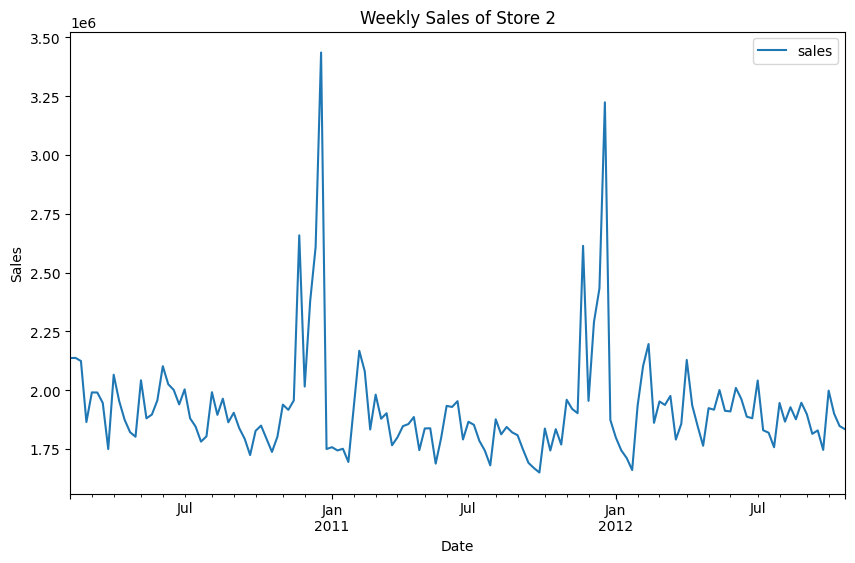

In [86]:
Store2.plot(figsize=(10, 6))
plt.title('Weekly Sales of Store 2')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

##Checking The Stationarity In The Data:-

In [87]:
result2 = adfuller(Store2['sales'])
print(result2)

(-3.7088625726189153, 0.003990207089066268, 6, 136, {'1%': -3.4793722137854926, '5%': -2.8830370378332995, '10%': -2.578233635380623}, 3512.243755386891)


In [88]:
if(result2[1]>0.05):
  print("The data is not stationary")
else:
  print("The data is stationary")

The data is stationary


##Decomposing The Time-Series Into Several Components: Trends, Seasonality And residual:-


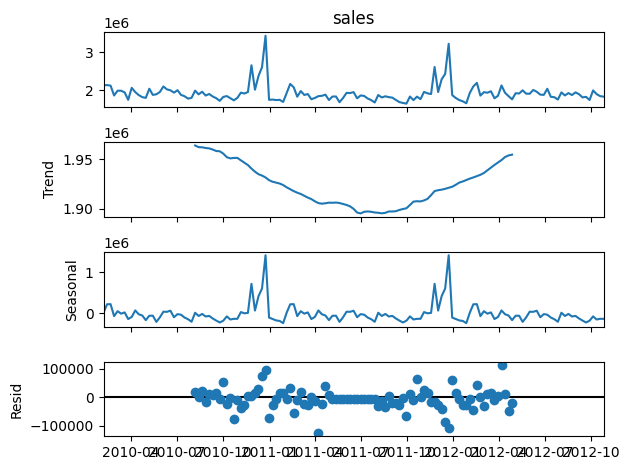

In [89]:
Decomposition = seasonal_decompose(Store2['sales'])
Decomposition.plot()
plt.show()


##Splitting The Data For Training and Testing:-

In [90]:
train = Store2.iloc[:120]
test = Store2.iloc[121:]

##Finding The best Order of p,q,d Using Itertools:-

In [91]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination


print(len(pdq_combination))

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

results

128


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  

RMSE
(0, 0, 0)  87490.902467
(0, 0, 1)  87856.231796
(0, 0, 2)  87411.487025
(0, 0, 3)  87899.561413
(0, 0, 4)  88961.804462
...                 ...
(7, 1, 3)  73227.059762
(7, 1, 4)  73131.148277
(7, 1, 5)  67061.915451
(7, 1, 6)  70164.209931
(7, 1, 7)  68166.230952

[128 rows x 1 columns]

In [92]:
results.sort_values("RMSE")


RMSE
(6, 1, 7)   63843.298246
(6, 1, 6)   64109.200779
(5, 1, 6)   64482.697279
(5, 1, 7)   65193.895861
(2, 1, 7)   65573.875154
...                  ...
(1, 1, 2)  110003.731148
(2, 1, 0)  116880.168043
(3, 1, 2)  118578.762753
(1, 1, 0)  121631.794648
(0, 1, 0)  135647.182827

[128 rows x 1 columns]

##Training The SARIMA Model:-

In [93]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model2=SARIMAX(train,order=(6,1,7),seasonal_order=(6,1,7,52))
model2=model2.fit()
Store2['predict']=model2.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:

<Axes: xlabel='date'>

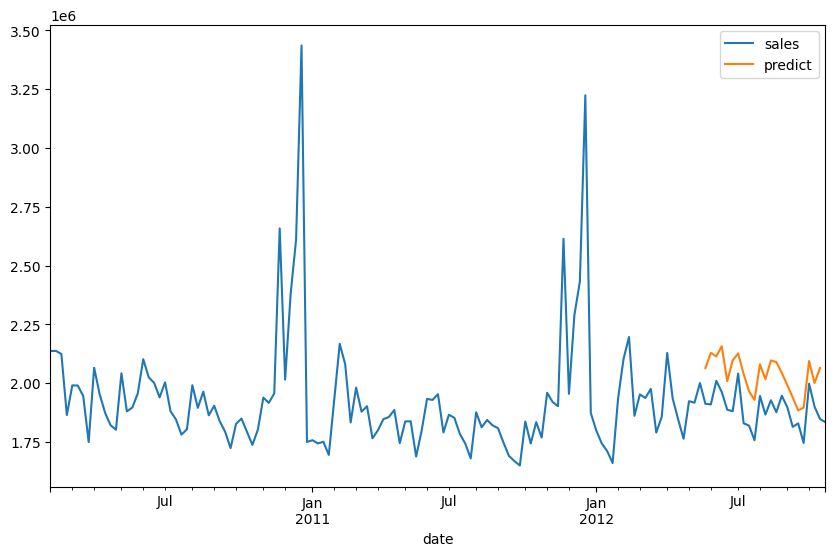

In [94]:
Store2[['sales','predict']].plot(figsize=(10,6))

##Forecasting Weekly Sales For Store{2}:-

<Axes: xlabel='date'>

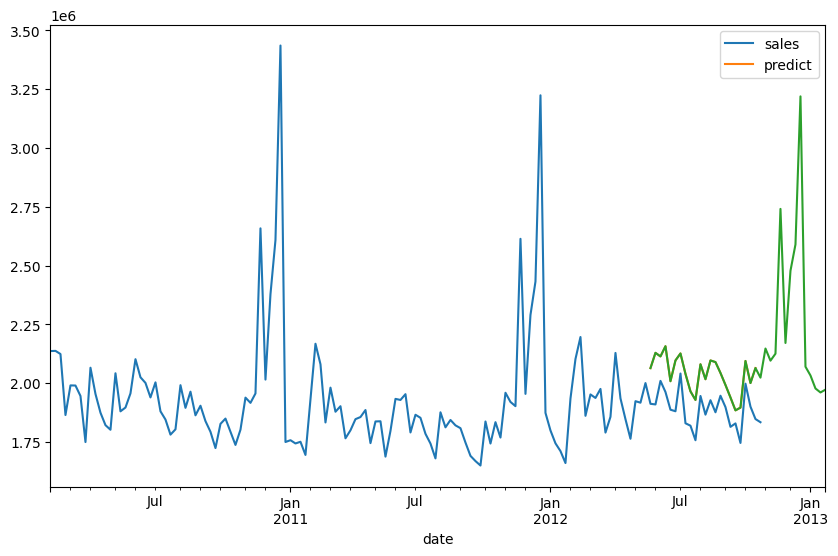

In [95]:
forecast2 = model2.forecast(steps = 36)
Store2.plot(figsize=(10,6))
forecast2.plot(figsize=(10,6))

#Building Predictive Model to Forecast Total Sales at Store{3}:-

##Filtering Data For Store{3}:-

In [96]:
Store3 = Walmart_dataset[Walmart_dataset['store'] == 3]
Store3

store       date      sales  holiday  temperature  fuel_price  \
286      3 2010-02-05  461622.22        0        45.71       2.572   
287      3 2010-02-12  420728.96        1        47.93       2.548   
288      3 2010-02-19  421642.19        0        47.07       2.514   
289      3 2010-02-26  407204.86        0        52.05       2.561   
290      3 2010-03-05  415202.04        0        53.04       2.625   
..     ...        ...        ...      ...          ...         ...   
424      3 2012-09-28  389813.02        0        77.46       3.666   
425      3 2012-10-05  443557.65        0        72.74       3.617   
426      3 2012-10-12  410804.39        0        70.31       3.601   
427      3 2012-10-19  424513.08        0        73.44       3.594   
428      3 2012-10-26  405432.70        0        74.66       3.506   

            cpi  unemployement  
286  214.424881          7.368  
287  214.574792          7.368  
288  214.619887          7.368  
289  214.647513          7.368  
290  214.675139          7.368  
..          ...            ...  
424  226.518093          6.334  
425  226.721036          6.034  
426  226.923979          6.034  
427  226.968844          6.034  
428  226.987364          6.034  

[143 rows x 8 columns]

##Creating Time-Series DataFrame and Setting "Date" Column As Index:-

In [97]:
Store3 = Store3[['date', 'sales']]
Store3.set_index('date', inplace=True)
Store3

sales
date                 
2010-02-05  461622.22
2010-02-12  420728.96
2010-02-19  421642.19
2010-02-26  407204.86
2010-03-05  415202.04
...               ...
2012-09-28  389813.02
2012-10-05  443557.65
2012-10-12  410804.39
2012-10-19  424513.08
2012-10-26  405432.70

[143 rows x 1 columns]

##Visualizing the Weekly Sales at Store{3}:-


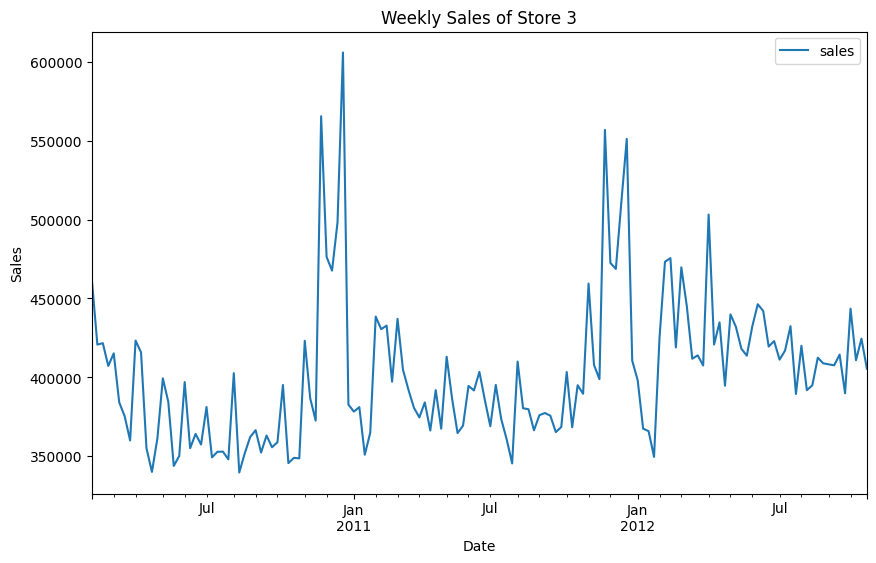

In [98]:
Store3.plot(figsize=(10, 6))
plt.title('Weekly Sales of Store 3')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

##Checking The Stationarity In The Data:-

In [99]:
result3 = adfuller(Store3['sales'])
print(result3)

(-2.963867745511323, 0.03840926179831256, 6, 136, {'1%': -3.4793722137854926, '5%': -2.8830370378332995, '10%': -2.578233635380623}, 3064.8688740270823)


In [100]:
if(result3[1]>0.05):
  print("The data is not stationary")
else:
  print("The data is stationary")

The data is stationary


##Decomposing The Time-Series Into Several Components: Trends, Seasonality And residual:-

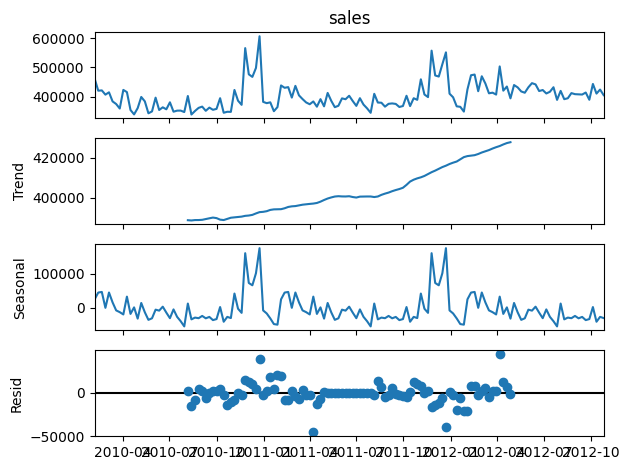

In [101]:
Decomposition = seasonal_decompose(Store3['sales'])
Decomposition.plot()
plt.show()

##Splitting The Data For Training and Testing:-

In [102]:
train = Store3.iloc[:120]
test = Store3.iloc[121:]

##Finding The best Order of p,q,d Using Itertools:-

In [103]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination


print(len(pdq_combination))

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

results

128


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  

RMSE
(0, 0, 0)  22451.585192
(0, 0, 1)  22138.911122
(0, 0, 2)  22139.533604
(0, 0, 3)  19792.780452
(0, 0, 4)  18646.753947
...                 ...
(7, 1, 3)  19197.889219
(7, 1, 4)  21562.773877
(7, 1, 5)  21441.529553
(7, 1, 6)  20616.754302
(7, 1, 7)  20888.102208

[128 rows x 1 columns]

In [104]:
results.sort_values("RMSE")

RMSE
(4, 1, 3)  15332.554996
(7, 0, 5)  15343.069416
(5, 1, 3)  15541.205826
(7, 0, 6)  15556.055102
(6, 0, 5)  16084.590186
...                 ...
(5, 1, 2)  23904.512626
(3, 1, 3)  25688.447887
(2, 1, 2)  27779.114950
(5, 0, 7)  29520.489798
(6, 0, 7)  32088.618583

[128 rows x 1 columns]

##Training The SARIMA Model:-

In [106]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model3=SARIMAX(train,order=(4,1,3),seasonal_order=(4,1,3,52))
model3=model3.fit()
Store3['predict']=model3.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few obser

<Axes: xlabel='date'>

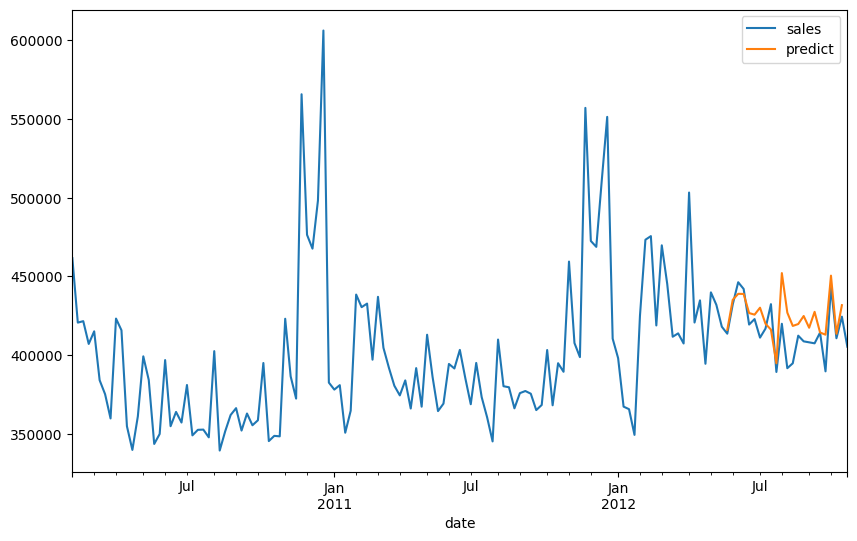

In [107]:
Store3[['sales','predict']].plot(figsize=(10,6))

##Forecasting Weekly Sales For Store{3}:-

<Axes: xlabel='date'>

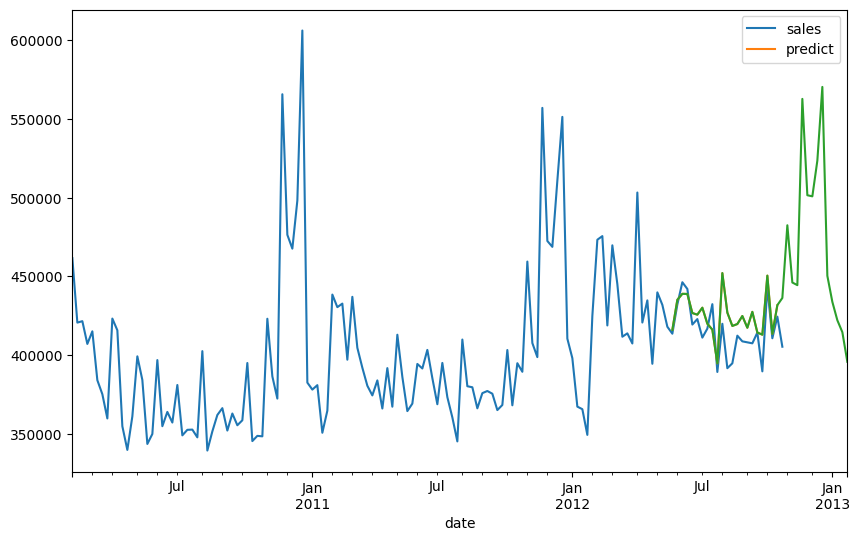

In [108]:
forecast3 = model3.forecast(steps = 36)
Store3.plot(figsize=(10,6))
forecast3.plot(figsize=(10,6))

#Building Predictive Model to Forecast Total Sales at Store{4}:-

##Filtering Data For Store{4}:-

In [109]:
Store4 = Walmart_dataset[Walmart_dataset['store'] == 4]
Store4

store       date       sales  holiday  temperature  fuel_price  \
429      4 2010-02-05  2135143.87        0        43.76       2.598   
430      4 2010-02-12  2188307.39        1        28.84       2.573   
431      4 2010-02-19  2049860.26        0        36.45       2.540   
432      4 2010-02-26  1925728.84        0        41.36       2.590   
433      4 2010-03-05  1971057.44        0        43.49       2.654   
..     ...        ...         ...      ...          ...         ...   
567      4 2012-09-28  2027620.23        0        71.74       3.666   
568      4 2012-10-05  2209835.43        0        63.07       3.620   
569      4 2012-10-12  2133026.07        0        57.11       3.603   
570      4 2012-10-19  2097266.85        0        64.46       3.610   
571      4 2012-10-26  2149594.46        0        63.64       3.514   

            cpi  unemployement  
429  126.442065          8.623  
430  126.496258          8.623  
431  126.526286          8.623  
432  126.552286          8.623  
433  126.578286          8.623  
..          ...            ...  
567  131.043000          4.077  
568  131.075667          3.879  
569  131.108333          3.879  
570  131.149968          3.879  
571  131.193097          3.879  

[143 rows x 8 columns]

##Creating Time-Series DataFrame and Setting "Date" Column As Index:-

In [110]:
Store4 = Store4[['date', 'sales']]
Store4.set_index('date', inplace=True)
Store4

sales
date                  
2010-02-05  2135143.87
2010-02-12  2188307.39
2010-02-19  2049860.26
2010-02-26  1925728.84
2010-03-05  1971057.44
...                ...
2012-09-28  2027620.23
2012-10-05  2209835.43
2012-10-12  2133026.07
2012-10-19  2097266.85
2012-10-26  2149594.46

[143 rows x 1 columns]

##Visualizing the Weekly Sales at Store{4}:-

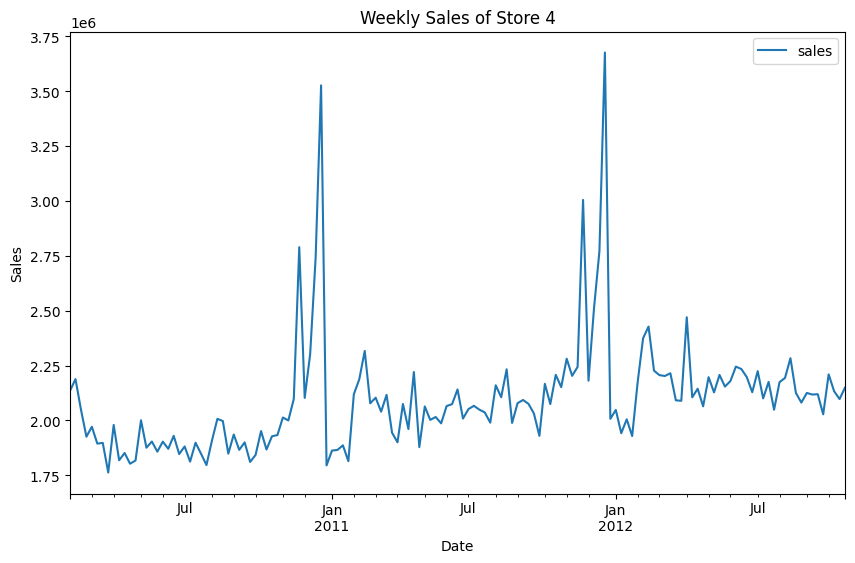

In [111]:
Store4.plot(figsize=(10, 6))
plt.title('Weekly Sales of Store 4')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

##Checking The Stationarity In The Data:-

In [112]:
result4 = adfuller(Store1['sales'])
print(result4)

(-5.102186145192288, 1.3877788330759434e-05, 4, 138, {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}, 3412.7325502876756)


In [113]:
if(result4[1]>0.05):
  print("The data is not stationary")
else:
  print("The data is stationary")

The data is stationary


##Decomposing The Time-Series Into Several Components: Trends, Seasonality And residual:-

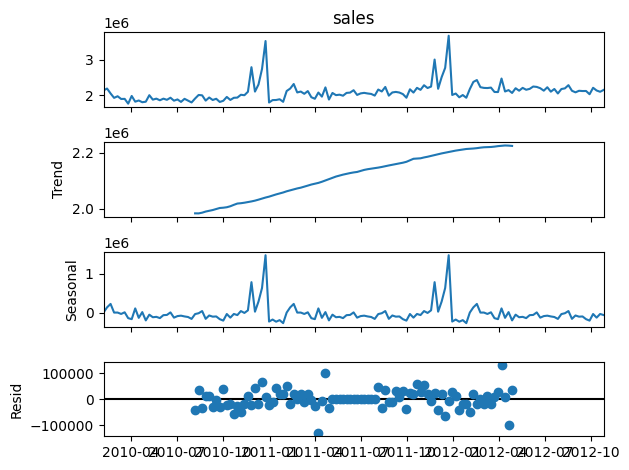

In [114]:
Decomposition = seasonal_decompose(Store4['sales'])
Decomposition.plot()
plt.show()

##Splitting The Data For Training and Testing:-

In [115]:
train = Store4.iloc[:120]
test = Store4.iloc[121:]

##Finding The best Order of p,q,d Using Itertools:-

In [116]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination


print(len(pdq_combination))

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

results

128


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  

RMSE
(0, 0, 0)  94225.266038
(0, 0, 1)  92842.750824
(0, 0, 2)  91197.008409
(0, 0, 3)  93243.146903
(0, 0, 4)  84964.897516
...                 ...
(7, 1, 3)  80785.863248
(7, 1, 4)  82871.592676
(7, 1, 5)  80575.193508
(7, 1, 6)  85974.441810
(7, 1, 7)  80314.360648

[128 rows x 1 columns]

In [117]:
results.sort_values("RMSE")

RMSE
(5, 1, 0)   63877.136609
(3, 1, 1)   64840.103787
(3, 1, 0)   65439.433854
(4, 1, 1)   65726.359829
(0, 1, 1)   66086.390475
...                  ...
(0, 0, 2)   91197.008409
(0, 0, 1)   92842.750824
(0, 0, 3)   93243.146903
(0, 0, 0)   94225.266038
(4, 0, 7)  111382.587183

[128 rows x 1 columns]

##Training The SARIMA Model:-

In [118]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model4=SARIMAX(train,order=(5,1,0),seasonal_order=(5,1,0,52))
model4=model4.fit()
Store4['predict']=model4.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
<ipython-input-118-598048e876a6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

<Axes: xlabel='date'>

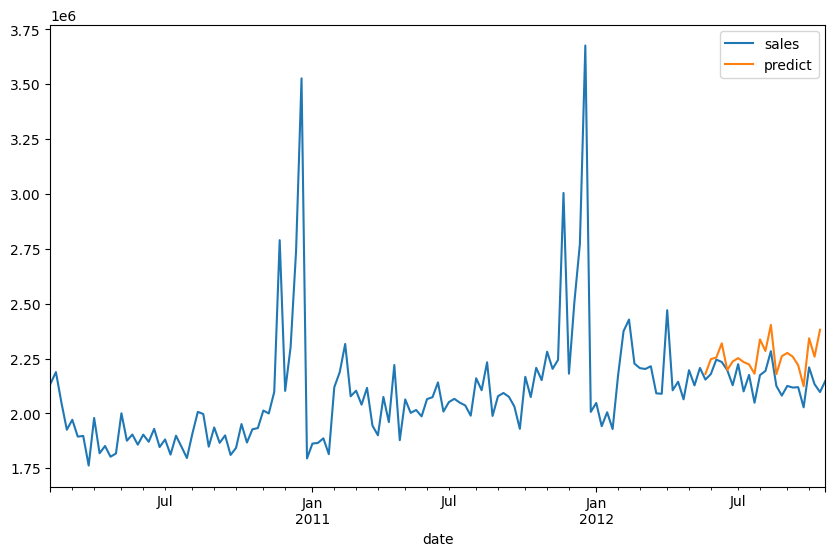

In [119]:
Store4[['sales','predict']].plot(figsize=(10,6))

##Forecasting Weekly Sales For Store{4}:-

<Axes: xlabel='date'>

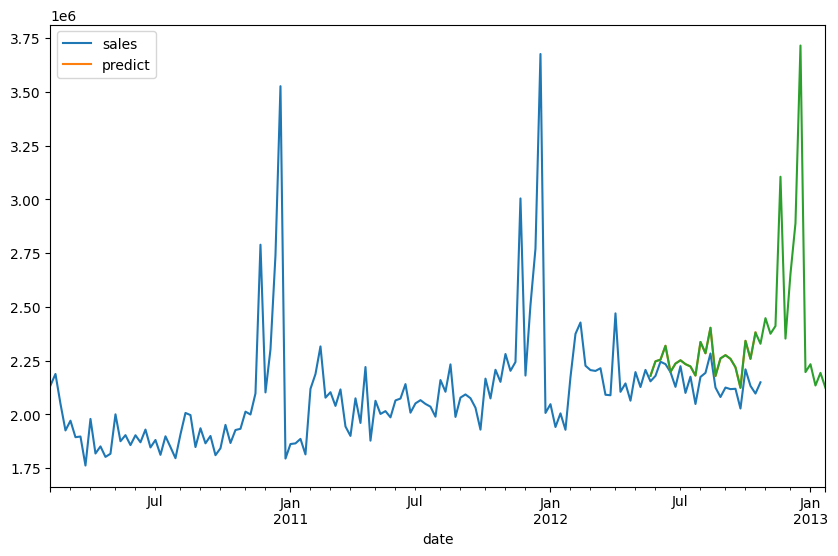

In [120]:
forecast4 = model4.forecast(steps = 36)
Store4.plot(figsize=(10,6))
forecast4.plot(figsize=(10,6))

#Building Predictive Model to Forecast Total Sales at Store{5}:-

##Filtering Data For Store{5}:-

In [121]:
Store5 = Walmart_dataset[Walmart_dataset['store'] == 5]
Store5

store       date      sales  holiday  temperature  fuel_price  \
572      5 2010-02-05  317173.10        0        39.70       2.572   
573      5 2010-02-12  311825.70        1        39.81       2.548   
574      5 2010-02-19  303447.57        0        41.14       2.514   
575      5 2010-02-26  270281.63        0        46.70       2.561   
576      5 2010-03-05  288855.71        0        48.89       2.625   
..     ...        ...        ...      ...          ...         ...   
710      5 2012-09-28  310141.68        0        78.33       3.666   
711      5 2012-10-05  343048.29        0        71.17       3.617   
712      5 2012-10-12  325345.41        0        66.24       3.601   
713      5 2012-10-19  313358.15        0        69.17       3.594   
714      5 2012-10-26  319550.77        0        71.70       3.506   

            cpi  unemployement  
572  211.653972          6.566  
573  211.800470          6.566  
574  211.847128          6.566  
575  211.877147          6.566  
576  211.907165          6.566  
..          ...            ...  
710  223.574102          5.603  
711  223.774444          5.422  
712  223.974787          5.422  
713  224.019287          5.422  
714  224.037814          5.422  

[143 rows x 8 columns]

##Creating Time-Series DataFrame and Setting "Date" Column As Index:-

In [122]:
Store5 = Store5[['date', 'sales']]
Store5.set_index('date', inplace=True)
Store5

sales
date                 
2010-02-05  317173.10
2010-02-12  311825.70
2010-02-19  303447.57
2010-02-26  270281.63
2010-03-05  288855.71
...               ...
2012-09-28  310141.68
2012-10-05  343048.29
2012-10-12  325345.41
2012-10-19  313358.15
2012-10-26  319550.77

[143 rows x 1 columns]

##Visualizing the Weekly Sales at Store{5}:-

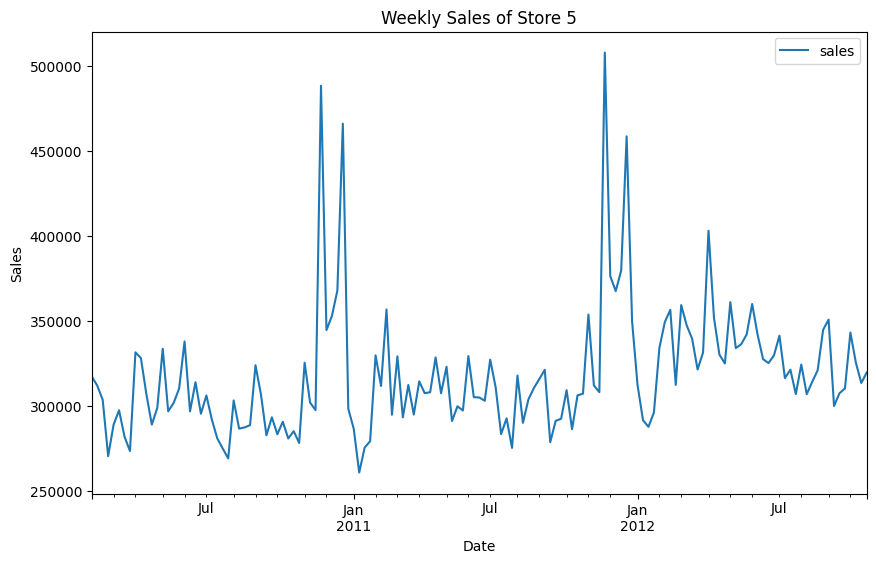

In [123]:
Store5.plot(figsize=(10, 6))
plt.title('Weekly Sales of Store 5')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

##Checking The Stationarity In The Data:-

In [124]:
result5 = adfuller(Store5['sales'])
print(result5)

(-4.310974424060915, 0.00042517056141923293, 4, 138, {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}, 3038.49592982281)


In [125]:
if(result5[1]>0.05):
  print("The data is not stationary")
else:
  print("The data is stationary")

The data is stationary


##Decomposing The Time-Series Into Several Components: Trends, Seasonality And residual:-

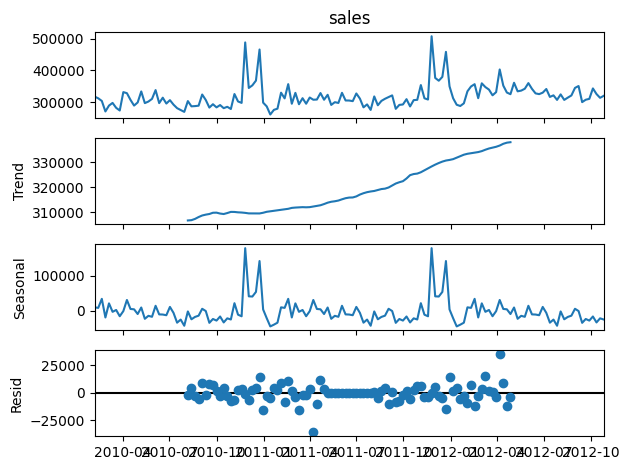

In [126]:
Decomposition = seasonal_decompose(Store5['sales'])
Decomposition.plot()
plt.show()

##Splitting The Data For Training and Testing:-

In [127]:
train = Store5.iloc[:120]
test = Store5.iloc[121:]

##Finding The best Order of p,q,d Using Itertools:-

In [128]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination


print(len(pdq_combination))

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

results

128


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  

RMSE
(0, 0, 0)  17754.765325
(0, 0, 1)  17209.669686
(0, 0, 2)  17141.657838
(0, 0, 3)  16931.946466
(0, 0, 4)  15725.073054
...                 ...
(7, 1, 3)  22336.279911
(7, 1, 4)  21244.125898
(7, 1, 5)  21643.204050
(7, 1, 6)  22650.740493
(7, 1, 7)  20930.946624

[128 rows x 1 columns]

In [129]:
results.sort_values("RMSE")

RMSE
(4, 0, 3)  14571.966638
(4, 0, 2)  14754.629959
(4, 0, 1)  15037.724970
(4, 0, 0)  15059.290565
(7, 0, 5)  15198.085164
...                 ...
(6, 1, 1)  22678.480097
(5, 1, 2)  22690.960259
(6, 1, 0)  24025.111430
(6, 1, 7)  24627.885000
(7, 1, 0)  24966.547950

[128 rows x 1 columns]

##Training The SARIMA Model:-

In [130]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model5=SARIMAX(train,order=(4,0,3),seasonal_order=(4,0,3,52))
model5=model5.fit()
Store5['predict']=model5.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
<ipython-input-130-0673682e71ee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

<Axes: xlabel='date'>

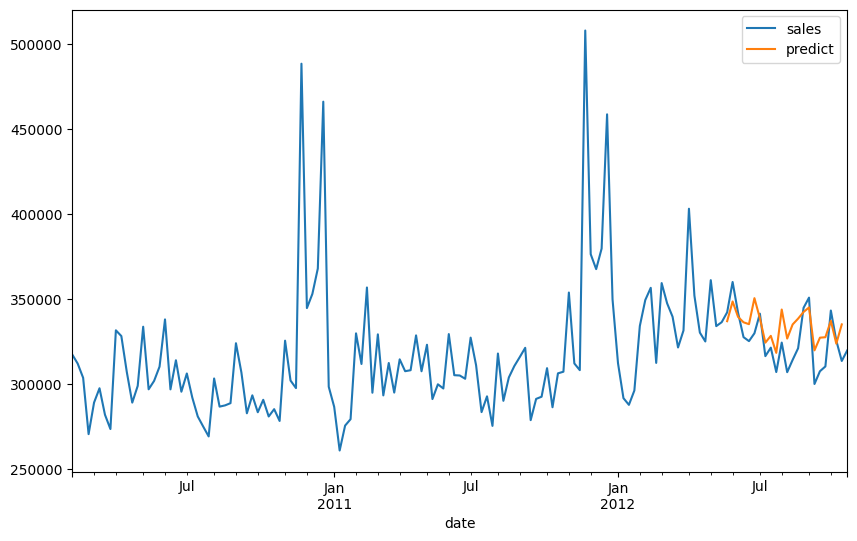

In [131]:
Store5[['sales','predict']].plot(figsize=(10,6))

##Forecasting Weekly Sales For Store{5}:-

<Axes: xlabel='date'>

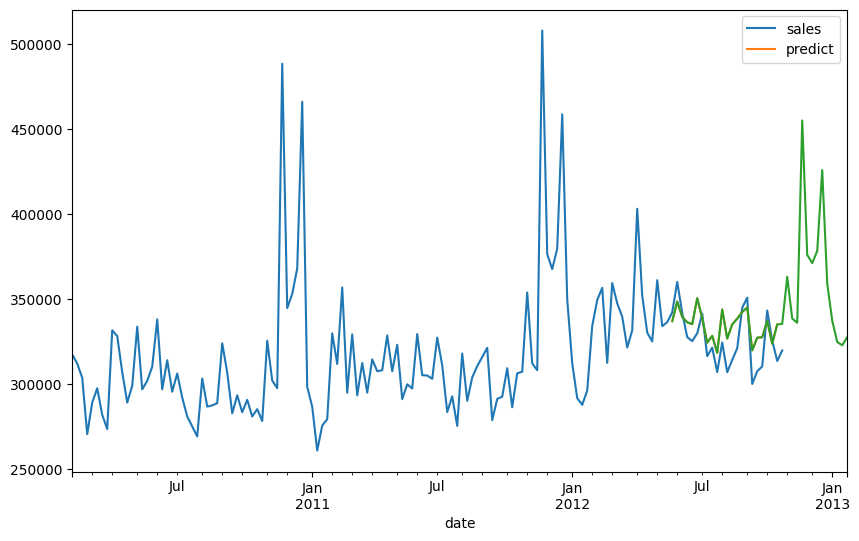

In [132]:
forecast5 = model5.forecast(steps = 36)
Store5.plot(figsize=(10,6))
forecast5.plot(figsize=(10,6))

#Building Predictive Model to Forecast Total Sales at Store{6}:-

##Filtering Data For Store{6}:-

In [133]:
Store6 = Walmart_dataset[Walmart_dataset['store'] == 6]
Store6

store       date       sales  holiday  temperature  fuel_price  \
715      6 2010-02-05  1652635.10        0        40.43       2.572   
716      6 2010-02-12  1606283.86        1        40.57       2.548   
717      6 2010-02-19  1567138.07        0        43.58       2.514   
718      6 2010-02-26  1432953.21        0        47.10       2.561   
719      6 2010-03-05  1601348.82        0        49.63       2.625   
..     ...        ...         ...      ...          ...         ...   
853      6 2012-09-28  1369131.46        0        77.82       3.666   
854      6 2012-10-05  1518177.71        0        70.84       3.617   
855      6 2012-10-12  1459396.84        0        65.43       3.601   
856      6 2012-10-19  1436883.99        0        69.68       3.594   
857      6 2012-10-26  1431426.34        0        72.34       3.506   

            cpi  unemployement  
715  212.622352          7.259  
716  212.770042          7.259  
717  212.816155          7.259  
718  212.845337          7.259  
719  212.874519          7.259  
..          ...            ...  
853  224.602971          5.668  
854  224.804222          5.329  
855  225.005473          5.329  
856  225.050101          5.329  
857  225.068625          5.329  

[143 rows x 8 columns]

##Creating Time-Series DataFrame and Setting "Date" Column As Index:-

In [134]:
Store6 = Store6[['date', 'sales']]
Store6.set_index('date', inplace=True)
Store6

sales
date                  
2010-02-05  1652635.10
2010-02-12  1606283.86
2010-02-19  1567138.07
2010-02-26  1432953.21
2010-03-05  1601348.82
...                ...
2012-09-28  1369131.46
2012-10-05  1518177.71
2012-10-12  1459396.84
2012-10-19  1436883.99
2012-10-26  1431426.34

[143 rows x 1 columns]

##Visualizing the Weekly Sales at Store{6}:-


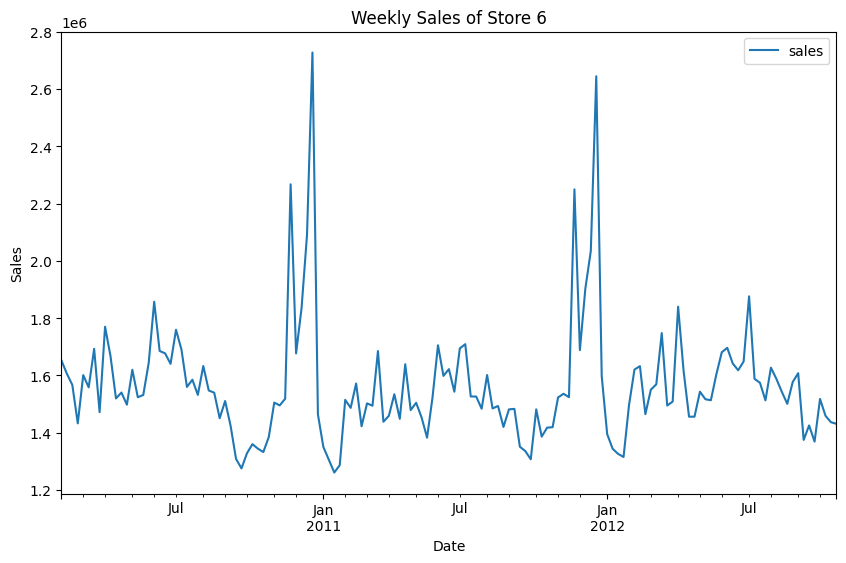

In [135]:
Store6.plot(figsize=(10, 6))
plt.title('Weekly Sales of Store 6')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

##Checking The Stationarity In The Data:-

In [136]:
result6 = adfuller(Store6['sales'])
print(result6)

(-5.492502135779504, 2.1594858682169703e-06, 4, 138, {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}, 3474.9714643671264)


In [137]:
if(result6[1]>0.05):
  print("The data is not stationary")
else:
  print("The data is stationary")

The data is stationary


##Decomposing The Time-Series Into Several Components: Trends, Seasonality And residual:-

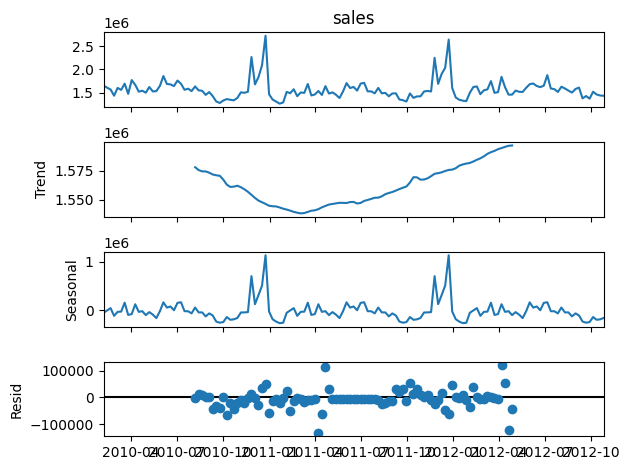

In [138]:
Decomposition = seasonal_decompose(Store6['sales'])
Decomposition.plot()
plt.show()

##Splitting The Data For Training and Testing:-

In [139]:
train = Store6.iloc[:120]
test = Store6.iloc[121:]

##Finding The best Order of p,q,d Using Itertools:-

In [140]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination


print(len(pdq_combination))

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

results

128


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  

RMSE
(0, 0, 0)  116666.573437
(0, 0, 1)  117220.550264
(0, 0, 2)  118274.985956
(0, 0, 3)  116500.690869
(0, 0, 4)  117248.825246
...                  ...
(7, 1, 3)  116465.925445
(7, 1, 4)  116812.644253
(7, 1, 5)  114940.057768
(7, 1, 6)  117433.947673
(7, 1, 7)  113417.059734

[128 rows x 1 columns]

In [141]:
results.sort_values("RMSE")

RMSE
(7, 0, 6)  107741.112483
(4, 1, 4)  112133.492578
(6, 0, 1)  112647.489440
(2, 1, 7)  112668.953686
(7, 0, 1)  112686.995177
...                  ...
(1, 1, 4)  127160.833845
(0, 1, 4)  127321.972846
(4, 1, 2)  127750.706448
(7, 0, 7)  127899.077227
(6, 1, 4)  147713.635160

[128 rows x 1 columns]

##Training The SARIMA Model:-

In [142]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model6=SARIMAX(train,order=(7,0,6),seasonal_order=(7,0,6,52))
model6=model6.fit()
Store6['predict']=model6.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:

<Axes: xlabel='date'>

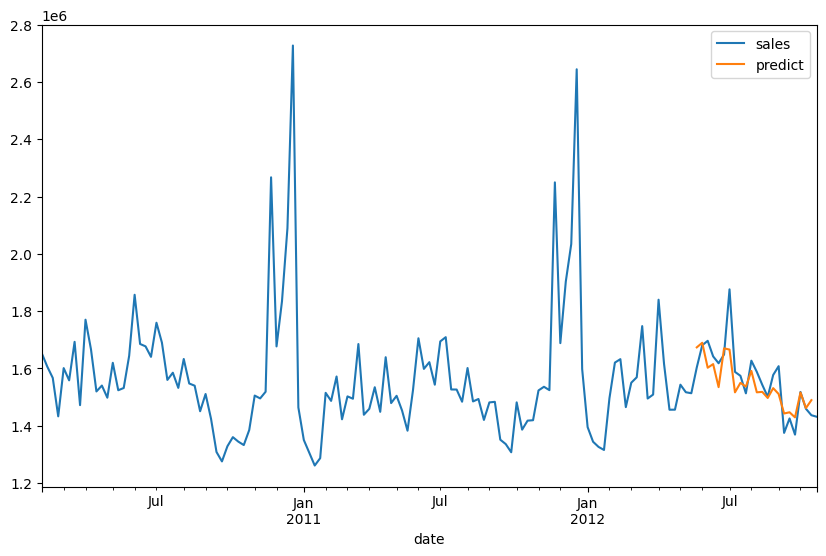

In [143]:
Store6[['sales','predict']].plot(figsize=(10,6))

##Forecasting Weekly Sales For Store{6}:-

<Axes: xlabel='date'>

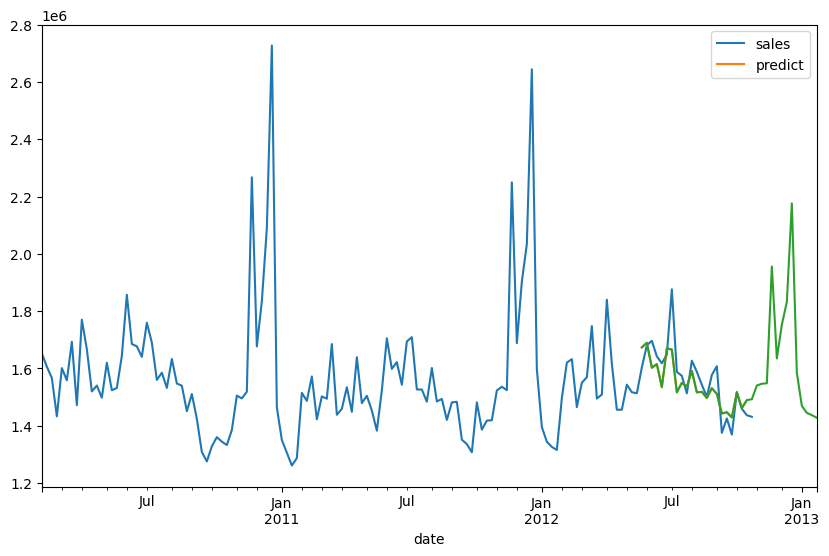

In [144]:
forecast6 = model6.forecast(steps = 36)
Store6.plot(figsize=(10,6))
forecast6.plot(figsize=(10,6))

#Building Predictive Model to Forecast Total Sales at Store{7}:-

##Filtering Data For Store{7}:-


In [145]:
Store7 = Walmart_dataset[Walmart_dataset['store'] == 7]
Store7

store       date      sales  holiday  temperature  fuel_price  \
858       7 2010-02-05  496725.44        0        10.53       2.580   
859       7 2010-02-12  524104.92        1        25.90       2.572   
860       7 2010-02-19  506760.54        0        27.28       2.550   
861       7 2010-02-26  496083.24        0        24.91       2.586   
862       7 2010-03-05  491419.55        0        35.86       2.620   
...     ...        ...        ...      ...          ...         ...   
996       7 2012-09-28  525545.76        0        50.64       3.789   
997       7 2012-10-05  505830.56        0        48.43       3.779   
998       7 2012-10-12  503463.93        0        41.43       3.760   
999       7 2012-10-19  516424.83        0        43.01       3.750   
1000      7 2012-10-26  495543.28        0        42.53       3.686   

             cpi  unemployement  
858   189.381697          9.014  
859   189.464272          9.014  
860   189.534100          9.014  
861   189.601802          9.014  
862   189.669505          9.014  
...          ...            ...  
996   198.590328          7.872  
997   198.822132          7.557  
998   199.053937          7.557  
999   199.148196          7.557  
1000  199.219532          7.557  

[143 rows x 8 columns]

##Creating Time-Series DataFrame and Setting "Date" Column As Index:-

In [146]:
Store7 = Store7[['date', 'sales']]
Store7.set_index('date', inplace=True)
Store7

sales
date                 
2010-02-05  496725.44
2010-02-12  524104.92
2010-02-19  506760.54
2010-02-26  496083.24
2010-03-05  491419.55
...               ...
2012-09-28  525545.76
2012-10-05  505830.56
2012-10-12  503463.93
2012-10-19  516424.83
2012-10-26  495543.28

[143 rows x 1 columns]

##Visualizing the Weekly Sales at Store{7}:-

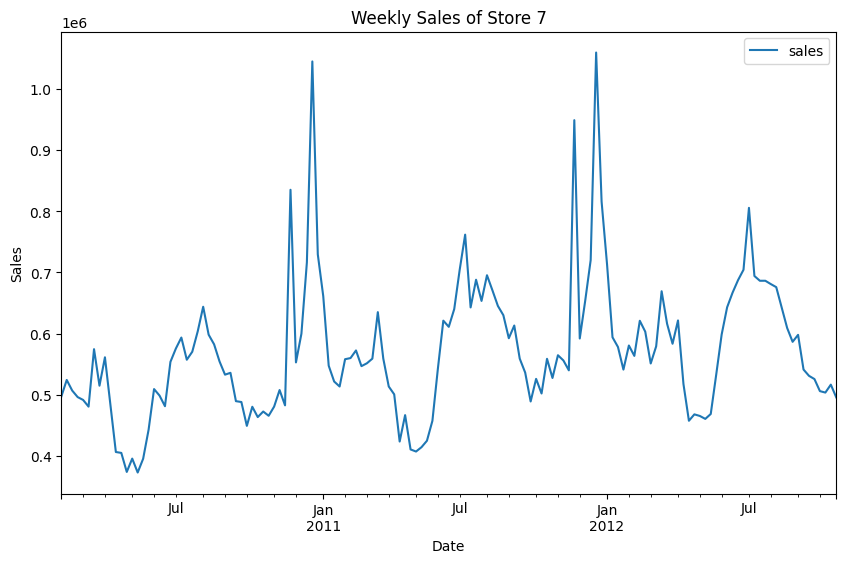

In [147]:
Store7.plot(figsize=(10, 6))
plt.title('Weekly Sales of Store 7')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

##Checking The Stationarity In The Data:-

In [148]:
result7 = adfuller(Store7['sales'])
print(result7)

(-4.476254338547255, 0.0002170071890711771, 7, 135, {'1%': -3.479742586699182, '5%': -2.88319822181578, '10%': -2.578319684499314}, 3260.418643955013)


In [149]:
if(result7[1]>0.05):
  print("The data is not stationary")
else:
  print("The data is stationary")

The data is stationary


##Decomposing The Time-Series Into Several Components: Trends, Seasonality And residual:-

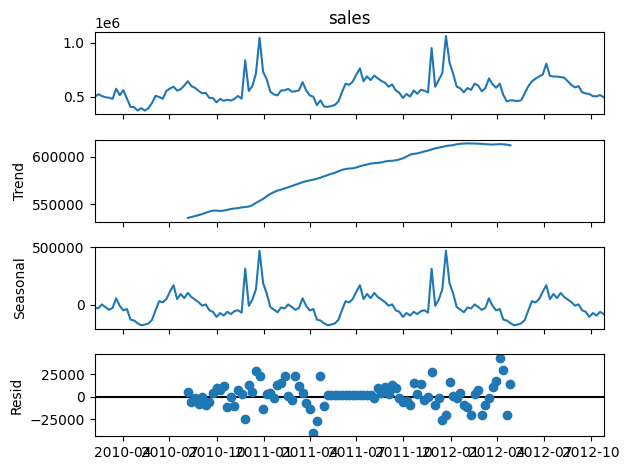

In [150]:
Decomposition = seasonal_decompose(Store7['sales'])
Decomposition.plot()
plt.show()

##Splitting The Data For Training and Testing:-

In [151]:
train = Store7.iloc[:120]
test = Store7.iloc[121:]

##Finding The best Order of p,q,d Using Itertools:-

In [152]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination


print(len(pdq_combination))

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

results

128


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  

RMSE
(0, 0, 0)   98926.489604
(0, 0, 1)   99534.684873
(0, 0, 2)  100582.574698
(0, 0, 3)  100132.687462
(0, 0, 4)  103035.915655
...                  ...
(7, 1, 3)  105381.995134
(7, 1, 4)  127550.092298
(7, 1, 5)   91805.655443
(7, 1, 6)   96129.749807
(7, 1, 7)   92217.846460

[128 rows x 1 columns]

In [153]:
results.sort_values("RMSE")

RMSE
(5, 1, 6)   88143.289557
(6, 1, 6)   89967.634285
(6, 1, 3)   90096.057387
(5, 1, 5)   90271.479744
(4, 1, 5)   90353.981994
...                  ...
(4, 1, 4)  174702.533927
(0, 1, 4)  174855.850562
(1, 1, 4)  175499.266819
(6, 1, 4)  188906.042364
(5, 1, 4)  191789.560410

[128 rows x 1 columns]

##Training The SARIMA Model:-

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model7=SARIMAX(train,order=(5,1,6),seasonal_order=(5,1,6,52))
model7=model7.fit()
Store7['predict']=model7.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few obser

In [ ]:
Store7[['sales','predict']].plot(figsize=(10,6))

##Forecasting Weekly Sales For Store{7}:-

In [ ]:
forecast7 = model7.forecast(steps = 36)
Store7.plot(figsize=(10,6))
forecast7.plot(figsize=(10,6))

#Building Predictive Model to Forecast Total Sales at Store{8}:-

##Filtering Data For Store{8}:-

In [ ]:
Store8 = Walmart_dataset[Walmart_dataset['store'] == 8]
Store8

##Creating Time-Series DataFrame and Setting "Date" Column As Index:-

In [ ]:
Store8 = Store8[['date', 'sales']]
Store8.set_index('date', inplace=True)
Store8

##Visualizing the Weekly Sales at Store{8}:-

In [ ]:
Store8.plot(figsize=(10, 6))
plt.title('Weekly Sales of Store 8')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

##Checking The Stationarity In The Data:-

In [ ]:
result8 = adfuller(Store8['sales'])
print(result8)

In [ ]:
if(result8[1]>0.05):
  print("The data is not stationary")
else:
  print("The data is stationary")

##Decomposing The Time-Series Into Several Components: Trends, Seasonality And residual:-

In [ ]:
Decomposition = seasonal_decompose(Store8['sales'])
Decomposition.plot()
plt.show()

##Splitting The Data For Training and Testing:-

In [ ]:
train = Store8.iloc[:120]
test = Store8.iloc[121:]

##Finding The best Order of p,q,d Using Itertools:-

In [ ]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination


print(len(pdq_combination))

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

results

##Training The SARIMA Model:-

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model8=SARIMAX(train,order=(7,0,6),seasonal_order=(7,0,6,52))
model8=model8.fit()
Store8['predict']=model8.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)

In [ ]:
Store8[['sales','predict']].plot(figsize=(10,6))

##Forecasting Weekly Sales For Store{8}:-

In [ ]:
forecast8 = model8.forecast(steps = 36)
Store8.plot(figsize=(10,6))
forecast8.plot(figsize=(10,6))

#Building Predictive Model to Forecast Total Sales at Store{9}:-

##Filtering Data For Store{9}:-

In [ ]:
Store9 = Walmart_dataset[Walmart_dataset['store'] == 9]
Store9

##Creating Time-Series DataFrame and Setting "Date" Column As Index:-

In [ ]:
Store9 = Store9[['date', 'sales']]
Store9.set_index('date', inplace=True)
Store9

##Visualizing the Weekly Sales at Store{9}:-

In [ ]:
Store9.plot(figsize=(10, 6))
plt.title('Weekly Sales of Store 9')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

##Checking The Stationarity In The Data:-

In [ ]:
result9 = adfuller(Store9['sales'])
print(result9)

In [ ]:
if(result9[1]>0.05):
  print("The data is not stationary")
else:
  print("The data is stationary")

##Decomposing The Time-Series Into Several Components: Trends, Seasonality And residual:-

In [ ]:
Decomposition = seasonal_decompose(Store9['sales'])
Decomposition.plot()
plt.show()

##Splitting The Data For Training and Testing:-

In [ ]:
train = Store9.iloc[:120]
test = Store9.iloc[121:]

##Finding The best Order of p,q,d Using Itertools:-

In [ ]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination


print(len(pdq_combination))

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

results

In [ ]:
results.sort_values("RMSE")

##Training The SARIMA Model:-

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model9=SARIMAX(train,order=(7,0,6),seasonal_order=(7,0,6,52))
model9=model9.fit()
Store9['predict']=model9.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)

In [ ]:
Store9[['sales','predict']].plot(figsize=(10,6))

##Forecasting Weekly Sales For Store{9}:-

In [ ]:
forecast9 = model9.forecast(steps = 36)
Store9.plot(figsize=(10,6))
forecast9.plot(figsize=(10,6))

#Building Predictive Model to Forecast Total Sales at Store{10}:-

##Filtering Data For Store{10}:-

In [ ]:
Store10 = Walmart_dataset[Walmart_dataset['store'] == 10]
Store10

##Creating Time-Series DataFrame and Setting "Date" Column As Index:-

In [ ]:
Store10 = Store10[['date', 'sales']]
Store10.set_index('date', inplace=True)
Store10

##Visualizing the Weekly Sales at Store{10}:-

In [ ]:
Store10.plot(figsize=(10, 6))
plt.title('Weekly Sales of Store 10')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

##Checking The Stationarity In The Data:-

In [ ]:
result10 = adfuller(Store10['sales'])
print(result10)

In [ ]:
if(result10[1]>0.05):
  print("The data is not stationary")
else:
  print("The data is stationary")

##Decomposing The Time-Series Into Several Components: Trends, Seasonality And residual:-

In [ ]:
Decomposition = seasonal_decompose(Store10['sales'])
Decomposition.plot()
plt.show()

##Splitting The Data For Training and Testing:-

In [ ]:
train = Store10.iloc[:120]
test = Store10.iloc[121:]

##Finding The best Order of p,q,d Using Itertools:-

In [ ]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination


print(len(pdq_combination))

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

results

In [ ]:
results.sort_values("RMSE")

##Training The SARIMA Model:-

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model10=SARIMAX(train,order=(7,0,6),seasonal_order=(7,0,6,52))
model10=model10.fit()
Store10['predict']=model10.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)

In [ ]:
Store10[['sales','predict']].plot(figsize=(10,6))

##Forecasting Weekly Sales For Store{10}:-

In [ ]:
forecast10 = model10.forecast(steps = 36)
Store10.plot(figsize=(10,6))
forecast10.plot(figsize=(10,6))

#Building Predictive Model to Forecast Total Sales at Store{11}:-

##Filtering Data For Store{11}:-

In [ ]:
Store11 = Walmart_dataset[Walmart_dataset['store'] == 11]
Store11

##Creating Time-Series DataFrame and Setting "Date" Column As Index:-

In [ ]:
Store11 = Store11[['date', 'sales']]
Store11.set_index('date', inplace=True)
Store11

##Visualizing the Weekly Sales at Store{11}:-

In [ ]:
Store11.plot(figsize=(10, 6))
plt.title('Weekly Sales of Store 11')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

##Checking The Stationarity In The Data:-

In [ ]:
result11 = adfuller(Store11['sales'])
print(result11)

In [ ]:
if(result11[1]>0.05):
  print("The data is not stationary")
else:
  print("The data is stationary")

##Decomposing The Time-Series Into Several Components: Trends, Seasonality And residual:-

In [ ]:
Decomposition = seasonal_decompose(Store11['sales'])
Decomposition.plot()
plt.show()

##Splitting The Data For Training and Testing:-

In [ ]:
train = Store11.iloc[:120]
test = Store11.iloc[121:]

##Finding The best Order of p,q,d Using Itertools:-

In [ ]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination


print(len(pdq_combination))

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

results

In [ ]:
results.sort_values("RMSE")

##Training The SARIMA Model:-

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model11=SARIMAX(train,order=(7,0,6),seasonal_order=(7,0,6,52))
model11=model11.fit()
Store11['predict']=model11.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)

In [ ]:
Store11[['sales','predict']].plot(figsize=(10,6))

##Forecasting Weekly Sales For Store{11}:-

In [ ]:
forecast11 = model11.forecast(steps = 36)
Store11.plot(figsize=(10,6))
forecast11.plot(figsize=(10,6))

#Building Predictive Model to Forecast Total Sales at Store{12}:-

##Filtering Data For Store{12}:-

In [ ]:
Store12 = Walmart_dataset[Walmart_dataset['store'] == 12]
Store12

##Creating Time-Series DataFrame and Setting "Date" Column As Index:-

In [ ]:
Store12 = Store12[['date', 'sales']]
Store12.set_index('date', inplace=True)
Store12

##Visualizing the Weekly Sales at Store{12}:-

In [ ]:
Store12.plot(figsize=(10, 6))
plt.title('Weekly Sales of Store 12')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

##Checking The Stationarity In The Data:-

In [ ]:
result12 = adfuller(Store12['sales'])
print(result12)

In [ ]:
if(result12[1]>0.05):
  print("The data is not stationary")
else:
  print("The data is stationary")

##Decomposing The Time-Series Into Several Components: Trends, Seasonality And residual:-

In [ ]:
Decomposition = seasonal_decompose(Store12['sales'])
Decomposition.plot()
plt.show()

##Splitting The Data For Training and Testing:-

In [ ]:
train = Store12.iloc[:120]
test = Store12.iloc[121:]

##Finding The best Order of p,q,d Using Itertools:-

In [ ]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination


print(len(pdq_combination))

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

results

In [ ]:
results.sort_values("RMSE")

##Training The SARIMA Model:-

In [ ]:
from statsmodel.tsa.statespace.sarimax import SARIMAX
model12=SARIMAX(train,order=(7,0,6),seasonal_order=(7,0,6,52))
model12=model12.fit()
Store12['predict']=model12.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)

In [ ]:
Store12[['sales','predict']].plot(figsize=(10,6))

##Forecasting Weekly Sales For Store{12}:-

In [ ]:
forecast12 = model12.forecast(steps = 36)
Store12.plot(figsize=(10,6))
forecast12.plot(figsize=(10,6))

#Building Predictive Model to Forecast Total Sales at Store{13}:-

##Filtering Data For Store{13}:-

In [ ]:
Store13 = Walmart_dataset[Walmart_dataset['store'] == 13]
Store13

##Creating Time-Series DataFrame and Setting "Date" Column As Index:-

In [ ]:
Store13 = Store13[['date', 'sales']]
Store13.set_index('date', inplace=True)
Store13

##Visualizing the Weekly Sales at Store{13}:-

In [ ]:
Store13.plot(figsize=(10, 6))
plt.title('Weekly Sales of Store 13')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

##Checking The Stationarity In The Data:-

In [ ]:
result13 = adfuller(Store13['sales'])
print(result13)

In [ ]:
result13.sort_values('RSME')

In [ ]:
if (result13[1]>0.05):
  print("The data is not stationary")
else:
  print("The data is stationary")

##Decomposing The Time-Series Into Several Components: Trends, Seasonality And residual:-

In [ ]:
Decomposition = seasonal_decompose(Store13['sales'])
Decomposition.plot()
plt.show()

##Splitting The Data For Training and Testing:-

In [ ]:
train = Store13.iloc[:120]
test = Store13.iloc[121:]

##Finding The best Order of p,d,q Using Itertools:-

In [ ]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination


print(len(pdq_combination))

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

results

In [ ]:
results.sort_values("RMSE")

##Training The SARIMA Model:-

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model13=SARIMAX(train,order=(7,0,6),seasonal_order=(7,0,6,52))
model13=model13.fit()
Store13['predict']=model13.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)

In [ ]:
Store13[['sales','predict']].plot(figsize=(10,6))

##Forecasting Weekly Sales For Store{13}:-

In [ ]:
forecast13 = model13.forecast(steps = 36)
Store13.plot(figsize=(10,6))
forecast13.plot(figsize=(10,6))

#Building Predictive Model to Forecast Total Sales at Store{14}:-

##Filtering Data For Store{14}:-

In [ ]:
Store14 = Walmart_dataset[Walmart_dataset['store'] == 14]
Store14

##Creating Time-Series DataFrame and Setting "Date" Column As Index:-

In [ ]:
Store14 = Store14[['date', 'sales']]
Store14.set_index('date', inplace=True)
Store14

##Visualizing the Weekly Sales at Store{14}:-

In [ ]:
Store14.plot(figsize=(10, 6))
plt.title('Weekly Sales of Store 14')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

##Checking The Stationarity In The Data:-

In [ ]:
result14 = adfuller(Store14['sales'])
print(result14)

In [ ]:
if(result14[1]>0.05):
  print("The data is not stationary")
else:
  print("The data is stationary")

##Decomposing The Time-Series Into Several Components: Trends, Seasonality And residual:-

In [ ]:
Decomposition = seasonal_decompose(Store14['sales'])
Decomposition.plot()
plt.show()

##Splitting The Data For Training and Testing:-

In [ ]:
train = Store14.iloc[:120]
test = Store14.iloc[121:]

##Finding The best Order of p,d,q Using Itertools:-

In [ ]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination


print(len(pdq_combination))

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

results

In [ ]:
results.sort_values("RMSE")

##Training The SARIMA Model:-

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model14=SARIMAX(train,order=(7,0,6),seasonal_order=(7,0,6,52))
model14=model14.fit()
Store14['predict']=model14.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)

In [ ]:
Store14[['sales','predict']].plot(figsize=(10,6))

##Forecasting Weekly Sales For Store{14}:-

In [ ]:
forecast14 = model14.forecast(steps = 36)
Store14.plot(figsize=(10,6))
forecast14.plot(figsize=(10,6))

#Building Predictive Model to Forecast Total Sales at Store{15}:-

##Filtering Data For Store{15}:-

In [ ]:
Store15 = Walmart_dataset[Walmart_dataset['store'] == 15]
Store15

##Creating Time-Series DataFrame and Setting "Date" Column As Index:-

In [ ]:
Store15 = Store15[['date', 'sales']]
Store15.set_index('date', inplace=True)
Store15

##Visualizing the Weekly Sales at Store{15}:-

In [ ]:
Store15.plot(figsize=(10, 6))
plt.title('Weekly Sales of Store 15')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

##Checking The Stationarity In The Data:-

In [ ]:
result15 = adfuller(Store15['sales'])
print(result15)

In [ ]:
if (result15[1]>0.05):
  print("The data is not stationary")
else:
  print("The data is stationary")

##Decomposing The Time-Series Into Several Components: Trends, Seasonality And residual:-

In [ ]:
Decomposition = seasonal_decompose(Store15['sales'])
Decomposition.plot()
plt.show()

##Splitting The Data For Training and Testing:-

In [ ]:
train = Store15.iloc[:120]
test = Store15.iloc[121:]

##Finding The best Order of p,d,q Using Itertools:-

In [ ]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination


print(len(pdq_combination))

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

results

In [ ]:
result15.sort_values('RSME')

##Training The SARIMA Model:-

In [ ]:
model15=SARIMAX(train,order=(7,0,6),seasonal_order=(7,0,6,52))
model15=model15.fit()
Store15['predict']=model15.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)

In [ ]:
Store15[['sales','predict']].plot(figsize=(10,6))

In [ ]:
forecast15 = model15.forecast(steps = 36)
Store15.plot(figsize=(10,6))
forecast15.plot(figsize=(10,6))

#Building Predictive Model to Forecast Total Sales at Store{16}:-

##Filtering Data For Store{16}:-

In [ ]:
Store16 = Walmart_dataset[Walmart_dataset['store'] == 16]
Store16

##Creating Time-Series DataFrame and Setting "Date" Column As Index:-

In [ ]:
Store16 = Store16[['date', 'sales']]
Store16.set_index('date', inplace=True)
Store16

##Visualizing the Weekly Sales at Store{16}:-

In [ ]:
Store16.plot(figsize=(10, 6))
plt.title('Weekly Sales of Store 16')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

##Checking The Stationarity In The Data:-

In [ ]:
result16 = adfuller(Store16['sales'])
print(result16)

In [ ]:
if (result16[1]>0.05):
  print("The data is not stationary")
else:
  print("The data is stationary")

##Decomposing The Time-Series Into Several Components: Trends, Seasonality And residual:-

In [ ]:
Decomposition = seasonal_decompose(Store16['sales'])
Decomposition.plot()
plt.show()

##Splitting The Data For Training and Testing:-

In [ ]:
train = Store16.iloc[:120]
test = Store16.iloc[121:]

##Finding The best Order of p,d,q Using Itertools:-

In [ ]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination


print(len(pdq_combination))

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

results

In [ ]:
results.sort_values("RMSE")

##Training The SARIMA Model:-

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model16=SARIMAX(train,order=(7,0,6),seasonal_order=(7,0,6,52))
model16=model16.fit()
Store16['predict']=model16.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)

In [ ]:
Store16[['sales','predict']].plot(figsize=(10,6))

##Forecasting Weekly Sales For Store{16}:-

In [ ]:
forecast16 = model16.forecast(steps = 36)
Store16.plot(figsize=(10,6))
forecast16.plot(figsize=(10,6))

#Building Predictive Model to Forecast Total Sales at Store{17}:-

##Filtering Data For Store{17}:-

In [ ]:
Store17 = Walmart_dataset[Walmart_dataset['store'] == 17]
Store17

##Creating Time-Series DataFrame and Setting "Date" Column As Index:-

In [ ]:
Store17 = Store17[['date', 'sales']]
Store17.set_index('date', inplace=True)
Store17

##Visualizing the Weekly Sales at Store{17}:-

In [ ]:
Store17.plot(figsize=(10, 6))
plt.title('Weekly Sales of Store 17')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

##Checking The Stationarity In The Data:-

In [ ]:
result17 = adfuller(Store17['sales'])
print(result17)

In [ ]:
if (result17[1]>0.05):
  print("The data is not stationary")
else:
  print("The data is stationary")

##Decomposing The Time-Series Into Several Components: Trends, Seasonality And residual:-

In [ ]:
Decomposition = seasonal_decompose(Store17['sales'])
Decomposition.plot()
plt.show()

##Splitting The Data For Training and Testing:-

In [ ]:
train = Store17.iloc[:120]
test = Store17.iloc[121:]

##Finding The best Order of p,d,q Using Itertools:-

In [ ]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination


print(len(pdq_combination))

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

results

In [ ]:
results.sort_values("RMSE")

##Training The SARIMA Model:-

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model17=SARIMAX(train,order=(7,0,6),seasonal_order=(7,0,6,52))
model17=model17.fit()
Store17['predict']=model17.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)

In [ ]:
Store17[['sales','predict']].plot(figsize=(10,6))

##Forecasting Weekly Sales For Store{17}:-

In [ ]:
forecast17 = model17.forecast(steps = 36)
Store17.plot(figsize=(10,6))
forecast17.plot(figsize=(10,6))

#Building Predictive Model to Forecast Total Sales at Store{18}:-

##Filtering Data For Store{18}:-

In [ ]:
Store18 = Walmart_dataset[Walmart_dataset['store'] == 18]
Store18



##Creating Time-Series DataFrame and Setting "Date" Column As Index:-

In [ ]:
Store18 = Store18[['date', 'sales']]
Store18.set_index('date', inplace=True)
Store18





##Visualizing the Weekly Sales at Store{18}:-

In [ ]:
Store18.plot(figsize=(10, 6))
plt.title('Weekly Sales of Store 18')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

##Checking The Stationarity In The Data:-

In [ ]:
result18 = adfuller(Store18['sales'])
print(result18)

In [ ]:
if result18[1]>0.05:
  print("The data is not stationary")
else:
  print("The data is stationary")

##Decomposing The Time-Series Into Several Components: Trends, Seasonality And residual:-

In [ ]:
Decomposition = seasonal_decompose(store18['sales'])
Decomposition.plot()
plt.show()

##Splitting The Data For Training and Testing:-

In [ ]:
train = Store18.iloc[:120]
test = Store18.iloc[121:]



##Finding The best Order of p,d,q Using Itertools:-

In [ ]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination


print(len(pdq_combination))

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

results

In [ ]:
results.sort_values("RMSE")



##Training The SARIMA Model:-

In [ ]:
model18=SARIMAX(train,order=(7,0,6),seasonal_order=(7,0,6,52))
model18=model18.fit()
Store18['predict']=model18.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)

In [ ]:
Store18[['sales','predict']].plot(figsize=(10,6))




##Forecasting Weekly Sales For Store{18}:-

In [ ]:
forecast18 = model18.forecast(steps = 36)
Store18.plot(figsize=(10,6))
forecast18.plot(figsize=(10,6))

#Building Predictive Model to Forecast Total Sales at Store{19}:-

##Filtering Data For Store{19}:-


In [ ]:
Store19 = Walmart_dataset[Walmart_dataset['store'] == 19]
Store19

##Creating Time-Series DataFrame and Setting "Date" Column As Index:-

In [ ]:
Store19 = Store19[['date', 'sales']]
Store19.set_index('date', inplace=True)
Store19

##Visualizing the Weekly Sales at Store{19}:-

In [ ]:
Store19.plot(figsize=(10, 6))
plt.title('Weekly Sales of Store 19')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

##Checking The Stationarity In The Data:-


In [ ]:
result19 = adfuller(Store19['sales'])
print(result19)

In [ ]:
if result19[1]>0.05:
  print("The data is not stationary")
else:
  print("The data is stationary")

##Decomposing The Time-Series Into Several Components: Trends, Seasonality And residual:-

In [ ]:
Decomposition = seasonal_decompose(Store19['sales'])
Decomposition.plot()
plt.show()

##Splitting The Data For Training and Testing:-

In [ ]:
train = Store19.iloc[:120]
test = Store19.iloc[121:]

##Finding The best Order of p,d,q Using Itertools:-

In [ ]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination


print(len(pdq_combination))

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

results

In [ ]:
results.sort_values("RMSE")

##Training The SARIMA Model:-

In [ ]:
model19=SARIMAX(train,order=(7,0,6),seasonal_order=(7,0,6,52))
model19=model19.fit()
Store19['predict']=model19.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)

In [ ]:
Store19[['sales','predict']].plot(figsize=(10,6))

##Forecasting Weekly Sales For Store{19}:-

In [ ]:
forecast19 = model19.forecast(steps = 36)
Store19.plot(figsize=(10,6))
forecast19.plot(figsize=(10,6))

#Building Predictive Model to Forecast Total Sales at Store{20}:-

##Filtering Data For Store{20}:-



In [ ]:
Store20 = Walmart_dataset[Walmart_dataset['store'] == 20]
Store20

##Creating Time-Series DataFrame and Setting "Date" Column As Index:-




In [ ]:
Store20 = Store20[['date', 'sales']]
Store20.set_index('date', inplace=True)
Store20


##Visualizing the Weekly Sales at Store{20}:-


In [ ]:
Store20.plot(figsize=(10, 6))
plt.title('Weekly Sales of Store 20')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


##Checking The Stationarity In The Data:-



In [ ]:
result20 = adfuller(Store20['sales'])
print(result20)

In [ ]:
if result20[1]>0.05:
  print("The data is not stationary")
else:
  print("The data is stationary")

##Decomposing The Time-Series Into Several Components: Trends, Seasonality And residual:-



In [ ]:
Decomposition = seasonal_decompose(Store20['sales'])
Decomposition.plot()
plt.show()

##Splitting The Data For Training and Testing:-



In [ ]:
train = Store20.iloc[:120]
test = Store20.iloc[121:]

##Finding The best Order of p,d,q Using Itertools:-



In [ ]:
imoprt itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination

print(len(pdq_combination))

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

results


In [ ]:
results.sort_values("RMSE")

##Training The SARIMA Model:-


In [ ]:
model20=SARIMAX(train,order=(7,0,6),seasonal_order=(7,0,6,52))
model20=model20.fit()
Store20['predict']=model20.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)

In [ ]:
Store20[['sales','predict']].plot(figsize=(10,6))


##Forecasting Weekly Sales For Store{20}:-

In [ ]:
forecast20 = model20.forecast(steps = 36)
Store20.plot(figsize=(10,6))
forecast20.plot(figsize=(10,6))

#Building Predictive Model to Forecast Total Sales at Store{21}:-

##Filtering Data For Store{21}:-

In [ ]:
Store21 = Walmart_dataset[Walmart_dataset['store'] == 21]
Store21

##Creating Time-Series DataFrame and Setting "Date" Column As Index:-




In [ ]:
Store21 = Store21[['date', 'sales']]
Store21.set_index('date', inplace=True)
Store21


##Visualizing the Weekly Sales at Store{21}:-


In [ ]:
Store21.plot(figsize=(10, 6))
plt.title('Weekly Sales of Store 21')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


##Checking The Stationarity In The Data:-



In [ ]:
result21 = adfuller(Store21['sales'])
print(result21)

In [ ]:
if result21[1]>0.05:
  print("The data is not stationary")
else:
  print("The data is stationary")

##Decomposing The Time-Series Into Several Components: Trends, Seasonality And residual:-


In [ ]:
Decomposition = seasonal_decompose(Store21['sales'])
Decomposition.plot()
plt.show()


##Splitting The Data For Training and Testing:-


In [ ]:
train = Store21.iloc[:120]
test = Store21.iloc[121:]


##Finding The best Order of p,d,q Using Itertools:-


In [ ]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination


print(len(pdq_combination))

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

results

In [ ]:
results.sort_values("RMSE")


##Training The SARIMA Model:-


In [ ]:
model21=SARIMAX(train,order=(7,0,6),seasonal_order=(7,0,6,52))
model21=model21.fit()
Store21['predict']=model21.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)

In [ ]:
Store21[['sales','predict']].plot(figsize=(10,6))


##Forecasting Weekly Sales For Store{21}:-

In [ ]:
forecast21 = model21.forecast(steps = 36)
Store21.plot(figsize=(10,6))
forecast21.plot(figsize=(10,6))

#Building Predictive Model to Forecast Total Sales at Store{22}:-

##Filtering Data For Store{22}:-



In [ ]:
Store22 = Walmart_dataset[Walmart_dataset['store'] == 22]
Store22

##Creating Time-Series DataFrame and Setting "Date" Column As Index:-




In [ ]:
Store22 = Store22[['date', 'sales']]
Store22.set_index('date', inplace=True)
Store22


##Visualizing the Weekly Sales at Store{22}:-


In [ ]:
Store22.plot(figsize=(10, 6))
plt.title('Weekly Sales of Store 22')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


##Checking The Stationarity In The Data:-


In [ ]:
result22 = adfuller(Store22['sales'])
print(result22)

In [ ]:
if result21[1]>0.05:
  print("The data is not stationary")
else:
  print("The data is stationary")


##Decomposing The Time-Series Into Several Components: Trends, Seasonality And residual:-


In [ ]:
Decomposition = seasonal_decompose(Store22['sales'])
Decomposition.plot()
plt.show()


##Splitting The Data For Training and Testing:-


In [ ]:
train = Store22.iloc[:120]
test = Store22.iloc[121:]


##Finding The best Order of p,d,q Using Itertools:-


In [ ]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination


print(len(pdq_combination))

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

results

In [ ]:
results.sort_values("RMSE")


##Training The SARIMA Model:-


In [ ]:
model22=SARIMAX(train,order=(7,0,6),seasonal_order=(7,0,6,52))
model22=model22.fit()
Store22['predict']=model22.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)

In [ ]:
Store22[['sales','predict']].plot(figsize=(10,6))


##Forecasting Weekly Sales For Store{22}:-

In [ ]:
forecast22 = model22.forecast(steps = 36)
Store22.plot(figsize=(10,6))
forecast22.plot(figsize=(10,6))

#Building Predictive Model to Forecast Total Sales at Store{23}:-

##Filtering Data For Store{23}:-



In [ ]:
Store23 = Walmart_dataset[Walmart_dataset['store'] == 23]
Store23

##Creating Time-Series DataFrame and Setting "Date" Column As Index:-




In [ ]:
Store23 = Store23[['date', 'sales']]
Store23.set_index('date', inplace=True)
Store23


##Visualizing the Weekly Sales at Store{23}:-


In [ ]:
Store23.plot(figsize=(10, 6))
plt.title('Weekly Sales of Store 23')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


##Checking The Stationarity In The Data:-


In [ ]:
result23 = adfuller(Store23['sales'])
print(result23)

In [ ]:
if result23[1]>0.05:
  print("The data is not stationary")
else:
  print("The data is stationary")


##Decomposing The Time-Series Into Several Components: Trends, Seasonality And residual:-


In [ ]:
Decomposition = seasonal_decompose(Store23['sales'])
Decomposition.plot()
plt.show()


##Splitting The Data For Training and Testing:-


In [ ]:
train = Store23.iloc[:120]
test = Store23.iloc[121:]


##Finding The best Order of p,d,q Using Itertools:-


In [ ]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination

print(len(pdq_combination))

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

results

In [ ]:
results.sort_values("RMSE")


##Training The SARIMA Model:-


In [ ]:
model23=SARIMAX(train,order=(7,0,6),seasonal_order=(7,0,6,52))
model23=model23.fit()
Store23['predict']=model23.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)

In [ ]:
Store23[['sales','predict']].plot(figsize=(10,6))

##Forecasting Weekly Sales For Store{23}:-

In [ ]:
forecast23 = model23.forecast(steps = 36)
Store23.plot(figsize=(10,6))
forecast23.plot(figsize=(10,6))

#Building Predictive Model to Forecast Total Sales at Store{24}:-

##Filtering Data For Store{24}:-


In [ ]:
Store24 = Walmart_dataset[Walmart_dataset['store'] == 24]
Store24


##Creating Time-Series DataFrame and Setting "Date" Column As Index:-


In [ ]:
Store24 = Store24[['date', 'sales']]
Store24.set_index('date', inplace=True)
Store24




##Visualizing the Weekly Sales at Store{24}:-


In [ ]:
Store24.plot(figsize=(10, 6))
plt.title('Weekly Sales of Store 24')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


##Checking The Stationarity In The Data:-


In [ ]:
results24 = adfuller(Store24['sales'])
print(result24)

In [ ]:
if result24[1]>0.05:
  print("The data is not stationary")
else:
  print("The data is stationary")


##Decomposing The Time-Series Into Several Components: Trends, Seasonality And residual:-


In [ ]:
Decomposition = seasonal_decompose(Store24['sales'])
Decomposition.plot()
plt.show()


##Splitting The Data For Training and Testing:-


In [ ]:
train = Store24.iloc[:120]
test = Store24.iloc[121:]


##Finding The best Order of p,d,q Using Itertools:-


In [ ]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination

print(len(pdq_combination))

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

results

In [ ]:
results.sort_values("RMSE")


##Training The SARIMA Model:-


In [ ]:
model24 = SARIMAX(train,order=(7,0,6),seasonal_order=(7,0,6,52))
model24 = model24.fit()
Store24['predict']=model24.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)

In [ ]:
Store24[['sales','predict']].plot(figsize=(10,6))


##Forecasting Weekly Sales For Store{24}:-

In [ ]:
forecast24 = model24.forecast(steps = 36)
Store24.plot(figsize=(10,6))
forecast24.plot(figsize=(10,6))

#Building Predictive Model to Forecast Total Sales at Store{25}:-

##Filtering Data For Store{25}:-


In [ ]:
Store25 = Walmart_dataset[Walmart_dataset['store'] == 25]
Store25


##Creating Time-Series DataFrame and Setting "Date" Column As Index:-


In [ ]:
Store25 = Store25[['date', 'sales']]
Store25.set_index('date', inplace=True)
Store25


##Visualizing the Weekly Sales at Store{25}:-


In [ ]:
Store25.plot(figsize=(10, 6))
plt.title('Weekly Sales of Store 25')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


##Checking The Stationarity In The Data:-


In [ ]:
result25 = adfuller(Store25['sales'])
print(result25)

In [ ]:
if result25[1]>0.05:
  print("The data is not stationary")
else:
  print("The data is stationary")


##Decomposing The Time-Series Into Several Components: Trends, Seasonality And residual:-


In [ ]:
Decomposition = seasonal_decompose(Store25['sales'])
Decomposition.plot()
plt.show()


##Splitting The Data For Training and Testing:-


In [ ]:
train = Store25.iloc[:120]
test = Store25.iloc[121:]


##Finding The best Order of p,d,q Using Itertools:-


In [ ]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination

print(len(pdq_combination))

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

results

In [ ]:
results.sort_values("RMSE")


##Training The SARIMA Model:-


In [ ]:
model25 = SARIMAX(train,order=(7,0,6),seasonal_order=(7,0,6,52))
model25 = model25.fit()
Store25['predict']=model25.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)

In [ ]:
Store25[['sales','predict']].plot(figsize=(10,6))


##Forecasting Weekly Sales For Store{25}:-

In [ ]:
forecast25 =  model25.forecast(steps = 36)
Store25.plot(figsize=(10,6))
forecast25.plot(figsize=(10,6))

#Building Predictive Model to Forecast Total Sales at Store{26}:-

##Filtering Data For Store{26}:-



In [ ]:
Store26 = Walmart_dataset[Walmart_dataset['store'] == 26]
Store26

##Creating Time-Series DataFrame and Setting "Date" Column As Index:-



In [ ]:
Store26 = Store26[['date', 'sales']]
Store26.set_index('date', inplace=True)
Store26



##Visualizing the Weekly Sales at Store{26}:-


In [ ]:
Store26.plot(figsize=(10, 6))
plt.title('Weekly Sales of Store 26')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


##Checking The Stationarity In The Data:-


In [ ]:
result26 = adfuller(Store26['sales'])
print(result26)

In [ ]:
if result26[1]>0.05:
  print("The data is not stationary")
else:
  print("The data is stationary")


##Decomposing The Time-Series Into Several Components: Trends, Seasonality And residual:-


In [ ]:
Decomposition = seasonal_decompose(Store26['sales'])
Decomposition.plot()
plt.show()


##Splitting The Data For Training and Testing:-


In [ ]:
train = Store26.iloc[:120]
test = Store26.iloc[121:]


##Finding The best Order of p,d,q Using Itertools:-


In [ ]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination

print(len(pdq_combination))

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

results

In [ ]:
results.sort_values("RMSE")


##Training The SARIMA Model:-


In [ ]:
model26 = SARIMAX(train,order=(7,0,6),seasonal_order=(7,0,6,52))
model26 = model26.fit()
Store26['predict']=model26.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)

In [ ]:
Store26[['sales','predict']].plot(figsize=(10,6))


##Forecasting Weekly Sales For Store{26}:-

In [ ]:
forecast26 = model26.forecast(steps = 36)
Store26.plot(figsize=(10,6))
forecast26.plot(figsize=(10,6))

#Building Predictive Model to Forecast Total Sales at Store{27}:-

##Filtering Data For Store{27}:-



In [ ]:
Store27 = Walmart_dataset[Walmart_dataset['store'] == 27]
Store27

##Creating Time-Series DataFrame and Setting "Date" Column As Index:-




In [ ]:
Store27 = Store27[['date', 'sales']]
Store27.set_index('date', inplace=True)
Store27


##Visualizing the Weekly Sales at Store{27}:-



In [ ]:
Store27.plot(figsize=(10, 6))
plt.title('Weekly Sales of Store 27')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

##Checking The Stationarity In The Data:-


In [ ]:
result27 = adfuller(Store27['sales'])
print(result27)

In [ ]:
if result27[1]>0.05:
  print("The data is not stationary")
else:
  print("The data is stationary")


##Decomposing The Time-Series Into Several Components: Trends, Seasonality And residual:-


In [ ]:
Decomposition = seasonal_decompose(Store27['sales'])
Decomposition.plot()
plt.show()


##Splitting The Data For Training and Testing:-


In [ ]:
train = Store27.iloc[:120]
test = Store27.iloc[121:]


##Finding The best Order of p,d,q Using Itertools:-


In [ ]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination

print(len(pdq_combination))

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

results

In [ ]:
results.sort_values("RMSE")


##Training The SARIMA Model:-


In [ ]:
model27 = SARIMAX(train,order=(7,0,6),seasonal_order=(7,0,6,52))
model27 = model27.fit()
Store27['predict']=model27.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)

In [ ]:
Store27[['sales','predict']].plot(figsize=(10,6))


##Forecasting Weekly Sales For Store{27}:-

In [ ]:
forecast27 = model27.forecast(steps = 36)
Store27.plot(figsize=(10,6))
forecast27.plot(figsize=(10,6))

#Building Predictive Model to Forecast Total Sales at Store{28}:-

##Filtering Data For Store{28}:-


In [ ]:
Store28 = Walmart_dataset[Walmart_dataset['store'] == 28]
Store28


##Creating Time-Series DataFrame and Setting "Date" Column As Index:-



In [ ]:
Store28 = Store28[['date', 'sales']]
Store28.set_index('date', inplace=True)
Store28



##Visualizing the Weekly Sales at Store{28}:-


In [ ]:
Store28.plot(figsize=(10, 6))
plt.title('Weekly Sales of Store 28')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


##Checking The Stationarity In The Data:-


In [ ]:
result28 = adfuller(Store28['sales'])
print(result28)

In [ ]:
if result28[1]>0.05:
  print("The data is not stationary")
else:
  print("The data is stationary")


##Decomposing The Time-Series Into Several Components: Trends, Seasonality And residual:-


In [ ]:
Decomposition = seasonal_decompose(Store28['sales'])
Decomposition.plot()
plt.show()


##Splitting The Data For Training and Testing:-


In [ ]:
train = Store28.iloc[:120]
test = Store28.iloc[121:]


##Finding The best Order of p,d,q Using Itertools:-


In [ ]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination

print(len(pdq_combination))

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

results

In [ ]:
results.sort_values("RMSE")


##Training The SARIMA Model:-


In [ ]:
model28 = SARIMAX(train,order=(7,0,6),seasonal_order=(7,0,6,52))
model28 = model28.fit()
Store28['predict']=model28.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)

In [ ]:
Store28[['sales','predict']].plot(figsize=(10,6))


##Forecasting Weekly Sales For Store{28}:-

In [ ]:
forecast28 = model28.forecast(steps = 36)
Store28.plot(figsize=(10,6))
forecast28.plot(figsize=(10,6))

#Building Predictive Model to Forecast Total Sales at Store{29}:-

##Filtering Data For Store{29}:-



In [ ]:
Store29 = Walmart_dataset[Walmart_dataset['store'] == 29]
Store29

##Creating Time-Series DataFrame and Setting "Date" Column As Index:-




In [ ]:
Store29 = Store29[['date', 'sales']]
Store29.set_index('date', inplace=True)
Store29


##Visualizing the Weekly Sales at Store{29}:-


In [ ]:
Store29.plot(figsize=(10, 6))
plt.title('Weekly Sales of Store 29')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


##Checking The Stationarity In The Data:-


In [ ]:
result29 = adfuller(Store29['sales'])
print(result29)

In [ ]:
if result29[1]>0.05:
  print("The data is not stationary")
else:
  print("The data is stationary")


##Decomposing The Time-Series Into Several Components: Trends, Seasonality And residual:-


In [ ]:
Decomposition = seasonal_decompose(Store29['sales'])
Decomposition.plot()
plt.show()


##Splitting The Data For Training and Testing:-


In [ ]:
train = store29.iloc[:120]
test = store29.iloc[121:]


##Finding The best Order of p,d,q Using Itertools:-


In [ ]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination

print(len(pdq_combination))

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

results

In [ ]:
results.sort_values("RMSE")


##Training The SARIMA Model:-


In [ ]:
model29 = SARIMAX(train,order=(7,0,6),seasonal_order=(7,0,6,52))
model29 = model29.fit()
Store29['predict']=model29.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)

In [ ]:
Store29[['sales','predict']].plot(figsize=(10,6))


##Forecasting Weekly Sales For Store{29}:-

In [ ]:
forecast29 = model29.forecast(steps = 36)
Store29.plot(figsize=(10,6))
forecast29.plot(figsize=(10,6))

#Building Predictive Model to Forecast Total Sales at Store{30}:-

##Filtering Data For Store{30}:-



In [ ]:
Store30 = Walmart_dataset[Walmart_dataset['store'] == 30]
Store30

##Creating Time-Series DataFrame and Setting "Date" Column As Index:-





In [ ]:
Store30 = Store30[['date', 'sales']]
Store30.set_index('date', inplace=True)
Store30

##Visualizing the Weekly Sales at Store{30}:-


In [ ]:
Store30.plot(figsize=(10, 6))
plt.title('Weekly Sales of Store 30')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


##Checking The Stationarity In The Data:-


In [ ]:
result30 = adfuller(Store30['sales'])
print(result30)

In [ ]:
if result30[1]>0.05:
  print("The data is not stationary")
else:
  print("The data is stationary")


##Decomposing The Time-Series Into Several Components: Trends, Seasonality And residual:-


In [ ]:
Decomposition = seasonal_decompose(Store30['sales'])
Decomposition.plot()
plt.show()


##Splitting The Data For Training and Testing:-


In [ ]:
train = Store30.iloc[:120]
test = Store30.iloc[121:]


##Finding The best Order of p,d,q Using Itertools:-


In [ ]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination

print(len(pdq_combination))

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

results

In [ ]:
results.sort_values("RMSE")


##Training The SARIMA Model:-


In [ ]:
model30 = SARIMAX(train,order=(7,0,6),seasonal_order=(7,0,6,52))
model30 = model30.fit()
Store30['predict']=model30.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)

In [ ]:
Store30[['sales','predict']].plot(figsize=(10,6))


##Forecasting Weekly Sales For Store{30}:-

In [ ]:
forecast30 = model30.forecast(steps = 36)
Store30.plot(figsize=(10,6))
forecast30.plot(figsize=(10,6))

#Building Predictive Model to Forecast Total Sales at Store{31}:-

##Filtering Data For Store{31}:-



In [ ]:
Store31 = Walmart_dataset[Walmart_dataset['store'] == 31]
Store31

##Creating Time-Series DataFrame and Setting "Date" Column As Index:-



In [ ]:
Store31 = Store31[['date', 'sales']]
Store31.set_index('date', inplace=True)
Store31



##Visualizing the Weekly Sales at Store{31}:-


In [ ]:
Store31.plot(figsize=(10, 6))
plt.title('Weekly Sales of Store 31')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


##Checking The Stationarity In The Data:-


In [ ]:
result31 = adfuller(Store31['sales'])
print(result31)

In [ ]:
if result31[1]>0.05:
  print("The data is not stationary")
else:
  print("The data is stationary")


##Decomposing The Time-Series Into Several Components: Trends, Seasonality And residual:-


In [ ]:
Decomposition = seasonal_decompose(Store31['sales'])
Decomposition.plot()
plt.show()


##Splitting The Data For Training and Testing:-


In [ ]:
train = Store31.iloc[:120]
test = Store31.iloc[121:]


##Finding The best Order of p,d,q Using Itertools:-


In [ ]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination

print(len(pdq_combination))

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

results

In [ ]:
results.sort_values("RMSE")


##Training The SARIMA Model:-


In [ ]:
model31 = SARIMAX(train,order=(7,0,6),seasonal_order=(7,0,6,52))
model31 = model31.fit()
Store31['predict']=model31.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)

In [ ]:
Store31[['sales','predict']].plot(figsize=(10,6))


##Forecasting Weekly Sales For Store{31}:-

In [ ]:
forecast31 = model31.forecast(steps = 36)
Store31.plot(figsize=(10,6))
forecast31.plot(figsize=(10,6))

#Building Predictive Model to Forecast Total Sales at Store{32}:-

##Filtering Data For Store{32}:-



In [ ]:
store32 = Walmart_dataset[Walmart_dataset['store'] == 32]
store32

##Creating Time-Series DataFrame and Setting "Date" Column As Index:-




In [ ]:
Store32 = store32[['date', 'sales']]
Store32.set_index('date', inplace=True)
Store32


##Visualizing the Weekly Sales at Store{32}:-


In [ ]:
Store31.plot(figsize=(10, 6))
plt.title('Weekly Sales of Store 32')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


##Checking The Stationarity In The Data:-


In [ ]:
result32 = adfuller(Store32['sales'])
print(result32)

In [ ]:
if result32[1]>0.05:
  print("The data is not stationary")
else:
  print("The data is stationary")


##Decomposing The Time-Series Into Several Components: Trends, Seasonality And residual:-


In [ ]:
Decomposition = seasonal_decompose(Store32['sales'])
Decomposition.plot()
plt.show()


##Splitting The Data For Training and Testing:-


In [ ]:
train = store32.iloc[:120]
test = store32.iloc[121:]


##Finding The best Order of p,d,q Using Itertools:-


In [ ]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination

print(len(pdq_combination))

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

results

In [ ]:
results.sort_values("RMSE")


##Training The SARIMA Model:-


In [ ]:
model32 = SARIMAX(train,order=(7,0,6),seasonal_order=(7,0,6,52))
model32 = model32.fit()
Store32['predict']=model32.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)

In [ ]:
Store32[['sales','predict']].plot(figsize=(10,6))


##Forecasting Weekly Sales For Store{32}:-

In [ ]:
forecast32 = model32.forecast(steps = 36)
Store32.plot(figsize=(10,6))
forecast32.plot(figsize=(10,6))

#Building Predictive Model to Forecast Total Sales at Store{33}:-

##Filtering Data For Store{33}:-



In [ ]:
Store33 = Walmart_dataset[Walmart_dataset['store'] == 33]
Store33

##Creating Time-Series DataFrame and Setting "Date" Column As Index:-




In [ ]:
Store33 = Store33[['date', 'sales']]
Store33.set_index('date', inplace=True)
Store33


##Visualizing the Weekly Sales at Store{33}:-


In [ ]:
Store33.plot(figsize=(10, 6))
plt.title('Weekly Sales of Store 33')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


##Checking The Stationarity In The Data:-


In [ ]:
result33 = adfuller(Store33['sales'])
print(result33)

In [ ]:
if result33[1]>0.05:
  print("The data is not stationary")
else:
  print("The data is stationary")


##Decomposing The Time-Series Into Several Components: Trends, Seasonality And residual:-


In [ ]:
Decomposition = seasonal_decompose(Store33['sales'])
Decomposition.plot()
plt.show()


##Splitting The Data For Training and Testing:-


In [ ]:
train = Store33.iloc[:120]
test = Store33.iloc[121:]


##Finding The best Order of p,d,q Using Itertools:-


In [ ]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination

print(len(pdq_combination))

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

results

In [ ]:
results.sort_values("RMSE")


##Training The SARIMA Model:-


In [ ]:
model33 = SARIMAX(train,order=(7,0,6),seasonal_order=(7,0,6,52))
model33 = model33.fit()
Store33['predict']=model33.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)

In [ ]:
Store33[['sales','predict']].plot(figsize=(10,6))


##Forecasting Weekly Sales For Store{33}:-

In [ ]:
forecast33 = model33.forecast(steps = 36)
Store33.plot(figsize=(10,6))
forecast33.plot(figsize=(10,6))

#Building Predictive Model to Forecast Total Sales at Store{34}:-

##Filtering Data For Store{34}:-



In [ ]:
Store34 = Walmart_dataset[Walmart_dataset['store'] == 34]
Store34

##Creating Time-Series DataFrame and Setting "Date" Column As Index:-



In [ ]:
Store34 = Store34[['date', 'sales']]
Store34.set_index('date', inplace=True)
Store34



##Visualizing the Weekly Sales at Store{34}:-



In [ ]:
Store34.plot(figsize=(10, 6))
plt.title('Weekly Sales of Store 34')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

##Checking The Stationarity In The Data:-


In [ ]:
result34 = adfuller(Store34['sales'])
print(result34)

In [ ]:
if result34[1]>0.05:
  print("The data is not stationary")
else:
  print("The data is stationary")


##Decomposing The Time-Series Into Several Components: Trends, Seasonality And residual:-


In [ ]:
Decomposition = seasonal_decompose(Store34['sales'])
Decomposition.plot()
plt.show()


##Splitting The Data For Training and Testing:-


In [ ]:
train = Store.iloc[:120]
test = Store.iloc[121:]


##Finding The best Order of p,d,q Using Itertools:-


In [ ]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination

print(len(pdq_combination))

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

results

In [ ]:
results.sort_values("RMSE")


##Training The SARIMA Model:-


In [ ]:
model34 = SARIMAX(train,order=(7,0,6),seasonal_order=(7,0,6,52))
model34 = model34.fit()
Store34['predict']=model34.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)

In [ ]:
Store34[['sales','predict']].plot(figsize=(10,6))


##Forecasting Weekly Sales For Store{34}:-

In [ ]:
forecast34 = model34.forecast(steps = 36)
Store34.plot(figsize=(10,6))
forecast34.plot(figsize=(10,6))

#Building Predictive Model to Forecast Total Sales at Store{35}:-

##Filtering Data For Store{35}:-



In [ ]:
Store35 = Walmart_dataset[Walmart_dataset['store'] == 35]
Store35

##Creating Time-Series DataFrame and Setting "Date" Column As Index:-




In [ ]:
Store35 = Store35[['date', 'sales']]
Store35.set_index('date', inplace=True)
Store35


##Visualizing the Weekly Sales at Store{35}:-


In [ ]:
Store35.plot(figsize=(10, 6))
plt.title('Weekly Sales of Store 35')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


##Checking The Stationarity In The Data:-


In [ ]:
result35 = adfuller(Store35['sales'])
print(result35)

In [ ]:
if result35[1]>0.05:
  print("The data is not stationary")
else:
  print("The data is stationary")


##Decomposing The Time-Series Into Several Components: Trends, Seasonality And residual:-


In [ ]:
Decomposition - seasonal_decompose(Store35['sales'])
Decomposition.plot()
plt.show()


##Splitting The Data For Training and Testing:-


In [ ]:
train = Store35.iloc[:120]
test = Store35.iloc[121:]


##Finding The best Order of p,d,q Using Itertools:-


In [ ]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination

print(len(pdq_combination))

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

results

In [ ]:
results.sort_values("RMSE")


##Training The SARIMA Model:-


In [ ]:
model35 = SARIMAX(train,order=(7,0,6),seasonal_order=(7,0,6,52))
model35 = model35.fit()
Store35['predict']=model35.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)

In [ ]:
Store35[['sales','predict']].plot(figsize=(10,6))


##Forecasting Weekly Sales For Store{35}:-

In [ ]:
forecast35 = model35.forecast(steps = 36)
Store35.plot(figsize=(10,6))
forecast35.plot(figsize=(10,6))

#Building Predictive Model to Forecast Total Sales at Store{36}:-

##Filtering Data For Store{36}:-



In [ ]:
Store36 = Walmart_dataset[Walmart_dataset['store'] == 36]
Store36

##Creating Time-Series DataFrame and Setting "Date" Column As Index:-


In [ ]:
Store36 = Store36[['date', 'sales']]
Store36.set_index('date', inplace=True)
Store36




##Visualizing the Weekly Sales at Store{36}:-


In [ ]:
Store36.plot(figsize=(10, 6))
plt.title('Weekly Sales of Store 36')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


##Checking The Stationarity In The Data:-


In [ ]:
result36 = adfuller(Store36['sales'])
print(result36)

In [ ]:
if result36[1]>0.05:
  print("The data is not stationary")
else:
  print("The data is stationary")


##Decomposing The Time-Series Into Several Components: Trends, Seasonality And residual:-


In [ ]:
Decomposition = seasonal_decompose(Store36['sales'])
Decomposition.plot()
plt.show()


##Splitting The Data For Training and Testing:-


In [ ]:
train = Store36.iloc[:120]
test = Store36.iloc[121:]


##Finding The best Order of p,d,q Using Itertools:-


In [ ]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination

print(len(pdq_combination))

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

results

In [ ]:
results.sort_values("RMSE")


##Training The SARIMA Model:-


In [ ]:
model36 = SARIMAX(train,order=(7,0,6),seasonal_order=(7,0,6,52))
model36 = model36.fit()
Store36['predict']=model36.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)

In [ ]:
Store36[['sales','predict']].plot(figsize=(10,6))


##Forecasting Weekly Sales For Store{36}:-

In [ ]:
forecast36 = model36.forecast(steps = 36)
Store36.plot(figsize=(10,6))
forecast36.plot(figsize=(10,6))

#Building Predictive Model to Forecast Total Sales at Store{37}:-

##Filtering Data For Store{37}:-


In [ ]:
Store37 = Walmart_dataset[Walmart_dataset['store'] == 37]
Store37


##Creating Time-Series DataFrame and Setting "Date" Column As Index:-




In [ ]:
Store37 = Store37[['date', 'sales']]
Store37.set_index('date', inplace=True)
Store37


##Visualizing the Weekly Sales at Store{37}:-


In [ ]:
Store37.plot(figsize=(10, 6))
plt.title('Weekly Sales of Store 37')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


##Checking The Stationarity In The Data:-


In [ ]:
results37 = adfuller(Store37['sales'])
print(results37)

In [ ]:
if results37[1]>0.05:
  print("The data is not stationary")
else:
  print("The data is stationary")


##Decomposing The Time-Series Into Several Components: Trends, Seasonality And residual:-


In [ ]:
Decomposition = seasonal_decompose(Store37['sales'])
Decomposition.plot()
plt.show()


##Splitting The Data For Training and Testing:-


In [ ]:
train = Store37.iloc[:120]
test = Store37.iloc[121:]


##Finding The best Order of p,d,q Using Itertools:-


In [ ]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination

print(len(pdq_combination))

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

results

In [ ]:
results.sort_values("RMSE")


##Training The SARIMA Model:-


In [ ]:
model37 = SARIMAX(train,order=(7,0,6),seasonal_order=(7,0,6,52))
model37 = model37.fit()
Store37['predict']=model37.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)

In [ ]:
Store37[['sales','predict']].plot(figsize=(10,6))


##Forecasting Weekly Sales For Store{37}:-

In [ ]:
forecast37 = model37.forecast(steps = 36)
Store37.plot(figsize=(10,6))
forecast37.plot(figsize=(10,6))

#Building Predictive Model to Forecast Total Sales at Store{38}:-

##Filtering Data For Store{38}:-


In [ ]:
Store38 = Walmart_dataset[Walmart_dataset['store'] == 38]
Store38


##Creating Time-Series DataFrame and Setting "Date" Column As Index:-




In [ ]:
Store38 = Store38[['date', 'sales']]
Store38.set_index('date', inplace=True)
Store38


##Visualizing the Weekly Sales at Store{38}:-


In [ ]:
Store38.plot(figsize=(10, 6))
plt.title('Weekly Sales of Store 38')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


##Checking The Stationarity In The Data:-


In [ ]:
result38 = adfuller(Store38['sales'])
print(result38)

In [ ]:
if result38[1]>0.05:
  print("The data is not stationary")
else:
  print("The data is stationary")


##Decomposing The Time-Series Into Several Components: Trends, Seasonality And residual:-


In [ ]:
Decomposition = seasonal_decompose(Store38['sales'])
Decomposition.plot()
plt.show()


##Splitting The Data For Training and Testing:-


In [ ]:
train = Store38.iloc[:120]
test = Store38.iloc[121:]


##Finding The best Order of p,d,q Using Itertools:-


In [ ]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination

print(len(pdq_combination))

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

results

In [ ]:
results.sort_values("RMSE")


##Training The SARIMA Model:-


In [ ]:
model38 = SARIMAX(train,order=(7,0,6),seasonal_order=(7,0,6,52))
model38 = model38.fit()
Store38['predict']=model38.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)

In [ ]:
Store38[['sales','predict']].plot(figsize=(10,6))


##Forecasting Weekly Sales For Store{38}:-

In [ ]:
forecast38 = model38.forecast(steps = 36)
Store38.plot(figsize=(10,6))
forecast38.plot(figsize=(10,6))

#Building Predictive Model to Forecast Total Sales at Store{39}:-

##Filtering Data For Store{39}:-


In [ ]:
Store39 = Walmart_dataset[Walmart_dataset['store'] == 39]
Store39


##Creating Time-Series DataFrame and Setting "Date" Column As Index:-




In [ ]:
Store39 = Store39[['date', 'sales']]
Store39.set_index('date', inplace=True)
Store39


##Visualizing the Weekly Sales at Store{39}:-


In [ ]:
Store39.plot(figsize=(10, 6))
plt.title('Weekly Sales of Store 39')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


##Checking The Stationarity In The Data:-


In [ ]:
result39 = adfuller(Store39['sales'])
print(result39)

In [ ]:
if result39[1]>0.05:
  print("The data is not stationary")
else:
  print("The data is stationary")


##Decomposing The Time-Series Into Several Components: Trends, Seasonality And residual:-


In [ ]:
Decomposition = seasonal_decompose(Store39['sales'])
Decomposition.plot()
plt.show()


##Splitting The Data For Training and Testing:-


In [ ]:
train = Store39.iloc[:120]
test = Store39.iloc[121:]


##Finding The best Order of p,d,q Using Itertools:-


In [ ]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination

print(len(pdq_combination))

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

results

In [ ]:
results.sort_values("RMSE")


##Training The SARIMA Model:-


In [ ]:
model39 = SARIMAX(train,order=(7,0,6),seasonal_order=(7,0,6,52))
model39 = model39.fit()
Store39['predict']=model39.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)

In [ ]:
Store39[['sales','predict']].plot(figsize=(10,6))


##Forecasting Weekly Sales For Store{39}:-

In [ ]:
forecast39 = model39.forecast(steps = 36)
Store39.plot(figsize=(10,6))
forecast39.plot(figsize=(10,6))

#Building Predictive Model to Forecast Total Sales at Store{40}:-

##Filtering Data For Store{40}:-


In [ ]:
Store40 = Walmart_dataset[Walmart_dataset['store'] == 40]
Store40


##Creating Time-Series DataFrame and Setting "Date" Column As Index:-



In [ ]:
Store40 = Store40[['date', 'sales']]
Store40.set_index('date', inplace=True)
Store40



##Visualizing the Weekly Sales at Store{40}:-


In [ ]:
Store40.plot(figsize=(10, 6))
plt.title('Weekly Sales of Store 40')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


##Checking The Stationarity In The Data:-


In [ ]:
result40 = adfuller(Store['sales'])
print(result40)

In [ ]:
if result40[1]>0.05:
  print("The data is not stationary")
else:
  print("The data is stationary")


##Decomposing The Time-Series Into Several Components: Trends, Seasonality And residual:-


In [ ]:
Decomposition = seasonal_decompose(Store40['sales'])
Decomposition.plot()
plt.show()


##Splitting The Data For Training and Testing:-


In [ ]:
train = Store40.iloc[:120]
test = Store40.iloc[121:]


##Finding The best Order of p,d,q Using Itertools:-


In [ ]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination

print(len(pdq_combination))

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

results

In [ ]:
results.sort_values("RMSE")


##Training The SARIMA Model:-


In [ ]:
model40 = SARIMAX(train,order=(7,0,6),seasonal_order=(7,0,6,52))
model40 = model40.fit()
Store40['predict']=model40.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)

In [ ]:
Store40[['sales','predict']].plot(figsize=(10,6))


##Forecasting Weekly Sales For Store{40}:-

In [ ]:
forecast40 = model40.forecast(steps = 36)
Store40.plot(figsize=(10,6))
forecast40.plot(figsize=(10,6))

#Building Predictive Model to Forecast Total Sales at Store{41}:-

##Filtering Data For Store{41}:-



In [ ]:
Store41 = Walmart_dataset[Walmart_dataset['store'] == 41]
Store41

##Creating Time-Series DataFrame and Setting "Date" Column As Index:-




In [ ]:
Store41 = Store41[['date', 'sales']]
Store41.set_index('date', inplace=True)
Store41


##Visualizing the Weekly Sales at Store{41}:-


In [ ]:
Store41.plot(figsize=(10, 6))
plt.title('Weekly Sales of Store 41')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


##Checking The Stationarity In The Data:-


In [ ]:
result41 = adfuller(Store41['sales'])
print(result41)

In [ ]:
if result41[1]>0.05:
  print("The data is not stationary")
else:
  print("The data is stationary")


##Decomposing The Time-Series Into Several Components: Trends, Seasonality And residual:-


In [ ]:
Decomposition = seasonal_decompose(Store41['sales'])
Decomposition.plot()
plt.show()


##Splitting The Data For Training and Testing:-


In [ ]:
train = Store41.iloc[:120]
test = Store41.iloc[121:]


##Finding The best Order of p,d,q Using Itertools:-


In [ ]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination

print(len(pdq_combination))

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

results

In [ ]:
results.sort_values("RMSE")


##Training The SARIMA Model:-


In [ ]:
model41 = SARIMAX(train,order=(7,0,6),seasonal_order=(7,0,6,52))
model41 = model41.fit()
Store41['predict']=model41.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)

In [ ]:
Store41[['sales','predict']].plot(figsize=(10,6))


##Forecasting Weekly Sales For Store{41}:-

In [ ]:
forecast41 = model41.forecast(steps = 36)
Store41.plot(figsize=(10,6))
forecast41.plot(figsize=(10,6))


#Building Predictive Model to Forecast Total Sales at Store{42}:-

##Filtering Data For Store{42}:-



In [ ]:
Store42 = Walmart_dataset[Walmart_dataset['store'] == 42]
Store42

##Creating Time-Series DataFrame and Setting "Date" Column As Index:-




In [ ]:
Store42 = Store42[['date', 'sales']]
Store42.set_index('date', inplace=True)
Store42


##Visualizing the Weekly Sales at Store{42}:-


In [ ]:
Store42.plot(figsize=(10, 6))
plt.title('Weekly Sales of Store 42')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


##Checking The Stationarity In The Data:-


In [ ]:
result42 = adfuller(Store42['sales'])
print(result42)

In [ ]:
if result42[1]>0.05:
  print("The data is not stationary")
else:
  print("The data is stationary")


##Decomposing The Time-Series Into Several Components: Trends, Seasonality And residual:-


In [ ]:
Decomposition = seasonal_decompose(Store42['sales'])
Decomposition.plot()
plt.show()


##Splitting The Data For Training and Testing:-


In [ ]:
train = Store42.iloc[:120]
test = Store42.iloc[121:]


##Finding The best Order of p,d,q Using Itertools:-


In [ ]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination

print(len(pdq_combination))

from sklearn.metrics import *
RMSE = []
order1 = []

for pdq in pdq_combination:
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        RMSE.append(error)


results = pd.DataFrame(index=order1, data=RMSE, columns=['RMSE'])

results

In [ ]:
results.sort_values("RMSE")


##Training The SARIMA Model:-


In [ ]:
model42 = SARIMAX(train,order=(7,0,6),seasonal_order=(7,0,6,52))
model42 = model42.fit()
Store42['predict']=model42.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)

In [ ]:
Store42[['sales','predict']].plot(figsize=(10,6))


##Forecasting Weekly Sales For Store{42}:-

In [ ]:
forecast42 = model42.forecast(steps = 36)
Store42.plot(figsize=(10,6))
forecast42.plot(figsize=(10,6))

#Building Predictive Model to Forecast Total Sales at Store{43}:-

##Filtering Data For Store{43}:-


In [ ]:
Store43 = Walmart_dataset[Walmart_dataset['store'] == 43]
Store43


##Creating Time-Series DataFrame and Setting "Date" Column As Index:-




In [ ]:
Store43 = Store43[['date', 'sales']]
Store43.set_index('date', inplace=True)
Store43


##Visualizing the Weekly Sales at Store{43}:-


In [ ]:
Store43.plot(figsize=(10, 6))
plt.title('Weekly Sales of Store 43')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


##Checking The Stationarity In The Data:-


In [ ]:
result43 = adfuller(Store43['sales'])
print(result43)

In [ ]:
if result43[1]>0.05:
  print("The data is not stationary")
else:
  print("The data is stationary")


##Decomposing The Time-Series Into Several Components: Trends, Seasonality And residual:-


In [ ]:
Decomposition = seasonal_decompose(Store43['sales'])
Decomposition.plot()
plt.show()


##Splitting The Data For Training and Testing:-


In [ ]:
train = Store43.iloc[:120]
test = Store43.iloc[121:]


##Finding The best Order of p,d,q Using Itertools:-


In [ ]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination

print(len(pdq_combination))

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

results

In [ ]:
results.sort_values("RMSE")


##Training The SARIMA Model:-


In [ ]:
model43 = SARIMAX(train,order=(7,0,6),seasonal_order=(7,0,6,52))
model43 = model43.fit()
Store43['predict']=model43.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)

In [ ]:
Store43[['sales','predict']].plot(figsize=(10,6))


##Forecasting Weekly Sales For Store{43}:-

In [ ]:
forecast43 = model43.forecast(steps = 36)
Store43.plot(figsize=(10,6))
forecast43.plot(figsize=(10,6))

#Building Predictive Model to Forecast Total Sales at Store{44}:-

##Filtering Data For Store{44}:-


In [ ]:
Store44 = Walmart_dataset[Walmart_dataset['store'] == 44]
Store44


##Creating Time-Series DataFrame and Setting "Date" Column As Index:-




In [ ]:
Store44 = Store44[['date', 'sales']]
Store44.set_index('date', inplace=True)
Store44


##Visualizing the Weekly Sales at Store{44}:-


In [ ]:
Store44.plot(figsize=(10, 6))
plt.title('Weekly Sales of Store 44')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


##Checking The Stationarity In The Data:-


In [ ]:
result44 = adfuller(Store44['sales'])
print(result44)

In [ ]:
if result44[1]>0.05:
  print("The data is not stationary")
else:
  print("The data is stationary")


##Decomposing The Time-Series Into Several Components: Trends, Seasonality And residual:-


In [ ]:
Decomposition = seasonal_decompose(Store44['sales'])
Decomposition.plot()
plt.show()


##Splitting The Data For Training and Testing:-


In [ ]:
train = Store44.iloc[:120]
test = Store44.iloc[121:]


##Finding The best Order of p,d,q Using Itertools:-


In [ ]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination

print(len(pdq_combination))

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

results

In [ ]:
results.sort_values("RMSE")


##Training The SARIMA Model:-


In [ ]:
model44 = SARIMAX(train,order=(7,0,6),seasonal_order=(7,0,6,52))
model44 = model44.fit()
Store44['predict']=model44.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)

In [ ]:
Store44[['sales','predict']].plot(figsize=(10,6))


##Forecasting Weekly Sales For Store{44}:-

In [ ]:
forecast44 = model44.forecast(steps = 36)
Store44.plot(figsize=(10,6))
forecast44.plot(figsize=(10,6))

#Building Predictive Model to Forecast Total Sales at Store{45}:-

##Filtering Data For Store{45}:-


In [ ]:
Store45 = Walmart_dataset[Walmart_dataset['store'] == 45]
Store45


##Creating Time-Series DataFrame and Setting "Date" Column As Index:-




In [ ]:
Store45 = Store45[['date', 'sales']]
Store45.set_index('date', inplace=True)
Store45


##Visualizing the Weekly Sales at Store{45}:-


In [ ]:
Store45.plot(figsize=(10, 6))
plt.title('Weekly Sales of Store 45')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


##Checking The Stationarity In The Data:-


In [ ]:
result45 = adfuller(Store['sales'])
print(result45)

In [ ]:
if result45[1]>0.05:
  print("The data is not stationary")
else:
  print("The data is stationary")


##Decomposing The Time-Series Into Several Components: Trends, Seasonality And residual:-


In [ ]:
Decomposition = seasonal_decompose(Store45['sales'])
Decomposition.plot()
plt.show()


##Splitting The Data For Training and Testing:-


In [ ]:
train = Store45.iloc[:120]
test = Store45.iloc[121:]


##Finding The best Order of p,d,q Using Itertools:-


In [ ]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination

print(len(pdq_combination))

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

results

In [ ]:
results.sort_values("RMSE")


##Training The SARIMA Model:-


In [ ]:
model45 = SARIMAX(train,order=(7,0,6),seasonal_order=(7,0,6,52))
model45 = model45.fit()
Store45['predict']=model45.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)

In [ ]:
Store45[['sales','predict']].plot(figsize=(10,6))


##Forecasting Weekly Sales For Store{45}:-

In [ ]:
forecast45 = model45.forecast(steps = 36)
Store45.plot(figsize=(10,6))
forecast45.plot(figsize=(10,6))